In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sample_sub = pd.read_csv('./data/sample_submission.csv')
test = pd.read_csv('./data/test.csv')
train = pd.read_csv('./data/train.csv')
cirrhosis = pd.read_csv('./data/cirrhosis.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# EDA

In [8]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [ ]:
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

Out of total 418 entries, some columns have less than 418 non-null entries

cirrhosis dataset에서 null 값 없는 row들만 추출

In [4]:
not_null_mask = cirrhosis.notnull().all(axis=1)
not_null_rows = cirrhosis[not_null_mask]
print(not_null_rows.shape)
not_null_rows.info()

(276, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    object 
 3   Drug           276 non-null    object 
 4   Age            276 non-null    int64  
 5   Sex            276 non-null    object 
 6   Ascites        276 non-null    object 
 7   Hepatomegaly   276 non-null    object 
 8   Spiders        276 non-null    object 
 9   Edema          276 non-null    object 
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets      276 non-null    float64
 18  

In [5]:
sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5271 non-null   int64  
 1   Status_C   5271 non-null   float64
 2   Status_CL  5271 non-null   float64
 3   Status_D   5271 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 164.8 KB


In [6]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [7]:
# Drop ID columns
test_id = test['id']
not_null_rows.drop('ID', axis = 1, inplace = True)
train.drop('id', axis = 1, inplace = True)
test.drop('id', axis = 1, inplace = True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19444\3189141655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_null_rows.drop('ID', axis = 1, inplace = True)


In [8]:
# combine train data + cirrhosis data for a bit larger dataset
train2 = pd.concat([train, not_null_rows])
train2 = train2.sort_index().reset_index().drop('index', axis=1)
train2.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,400,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,D
2,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
3,4500,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,C
4,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D


<AxesSubplot:title={'center':'Absolute Pearson Correalation of All Features'}>

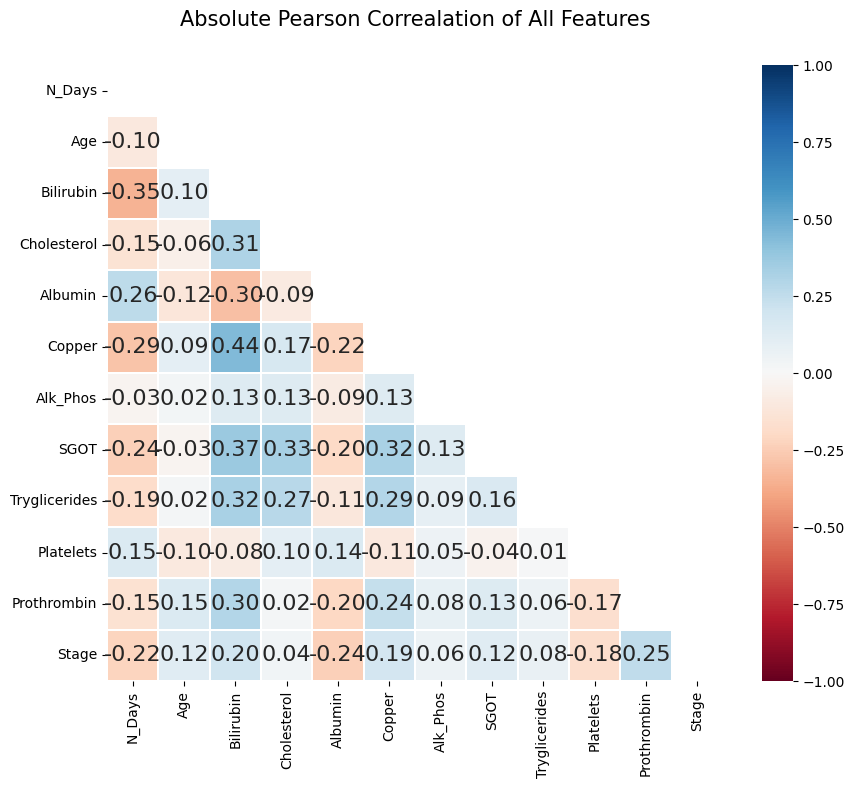

In [9]:
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(10, 8))

plt.title('Absolute Pearson Correalation of All Features', y=1.05, size=15)
corr = train2.corr()
# Getting the Upper Triangle of the co-relation matrix
upper = np.triu(corr)

sns.heatmap(corr, linewidths=0.1, vmin = -1.0, vmax=1.0, square=True, mask=upper,
            cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16}, fmt='.2f')

In [10]:
corr = train2.corr()
abs = corr.abs()
sort = abs.unstack().sort_values(ascending= False)

print(sort[(sort<1) & (sort>0.3)])

Bilirubin      Copper           0.443826
Copper         Bilirubin        0.443826
SGOT           Bilirubin        0.372026
Bilirubin      SGOT             0.372026
N_Days         Bilirubin        0.349732
Bilirubin      N_Days           0.349732
Cholesterol    SGOT             0.328656
SGOT           Cholesterol      0.328656
Copper         SGOT             0.323208
SGOT           Copper           0.323208
Bilirubin      Tryglicerides    0.322596
Tryglicerides  Bilirubin        0.322596
Cholesterol    Bilirubin        0.307030
Bilirubin      Cholesterol      0.307030
               Albumin          0.303942
Albumin        Bilirubin        0.303942
dtype: float64


No coefficients are correlated more than 0.5

<div class="shadow"><div class="flex items-center justify-between p-4 hover:bg-base-200" role="button" tabindex="0"><div class="flex items-center gap-4" slot="title"><h1 class="text-xl font-semibold text-primary" data-svelte-h="svelte-fywzbh">Variables Table</h1> </div> <svg xmlns="http://www.w3.org/2000/svg" height="20" width="20" class="fill-primary transition-transform -rotate-180"><path d="m10 13.062-5-5L6.062 7 10 10.938 13.938 7 15 8.062Z"></path></svg></div> <div class="p-4 pt-0" style=""><div><div><div class="overflow-x-auto"><table class="my-4 table w-full"><thead><tr><th>Variable Name</th><th>Role</th><th>Type</th><th>Demographic</th><th>Description</th><th>Units</th><th>Missing Values</th></tr></thead> <tbody><tr><td>ID</td><td>ID</td><td>Integer</td><td></td><td>unique identifier</td><td></td><td>no</td> </tr><tr><td>N_Days</td><td>Other</td><td>Integer</td><td></td><td>number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986</td><td></td><td>no</td> </tr><tr><td>Status</td><td>Target</td><td>Categorical</td><td></td><td>status of the patient C (censored), CL (censored due to liver tx), or D (death)</td><td></td><td>no</td> </tr><tr><td>Drug</td><td>Feature</td><td>Categorical</td><td></td><td>type of drug D-penicillamine or placebo</td><td></td><td>yes</td> </tr><tr><td>Age</td><td>Feature</td><td>Integer</td><td>Age</td><td>age</td><td>days</td><td>no</td> </tr><tr><td>Sex</td><td>Feature</td><td>Categorical</td><td>Sex</td><td>M (male) or F (female)</td><td></td><td>no</td> </tr><tr><td>Ascites</td><td>Feature</td><td>Categorical</td><td></td><td>presence of ascites N (No) or Y (Yes)</td><td></td><td>yes</td> </tr><tr><td>Hepatomegaly</td><td>Feature</td><td>Categorical</td><td></td><td>presence of hepatomegaly N (No) or Y (Yes)</td><td></td><td>yes</td> </tr><tr><td>Spiders</td><td>Feature</td><td>Categorical</td><td></td><td>presence of spiders N (No) or Y (Yes)</td><td></td><td>yes</td> </tr><tr><td>Edema</td><td>Feature</td><td>Categorical</td><td></td><td>presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)</td><td></td><td>no</td> </tr><tr><td>Bilirubin</td><td>Feature</td><td>Continuous</td><td></td><td>serum bilirubin</td><td>mg/dl</td><td>no</td> </tr><tr><td>Cholesterol</td><td>Feature</td><td>Integer</td><td></td><td>serum cholesterol</td><td>mg/dl</td><td>yes</td> </tr><tr><td>Albumin</td><td>Feature</td><td>Continuous</td><td></td><td>albumin</td><td>gm/dl</td><td>no</td> </tr><tr><td>Copper</td><td>Feature</td><td>Integer</td><td></td><td>urine copper</td><td>ug/day</td><td>yes</td> </tr><tr><td>Alk_Phos</td><td>Feature</td><td>Continuous</td><td></td><td>alkaline phosphatase</td><td>U/liter</td><td>yes</td> </tr><tr><td>SGOT</td><td>Feature</td><td>Continuous</td><td></td><td>SGOT</td><td>U/ml</td><td>yes</td> </tr><tr><td>Tryglicerides</td><td>Feature</td><td>Integer</td><td></td><td>tryglicerides</td><td></td><td>yes</td> </tr><tr><td>Platelets</td><td>Feature</td><td>Integer</td><td></td><td>platelets per cubic</td><td>ml/1000</td><td>yes</td> </tr><tr><td>Prothrombin</td><td>Feature</td><td>Continuous</td><td></td><td>prothrombin time</td><td>s</td><td>yes</td> </tr><tr><td>Stage</td><td>Feature</td><td>Categorical</td><td></td><td>histologic stage of disease (1, 2, 3, or 4)</td><td></td><td>yes</td> </tr></tbody></table></div> <div class="my-4 flex flex-wrap items-center justify-end gap-4"><label><span>Rows per page</span> <select class="select-primary select select-sm rounded-full"><option value="5">5</option><option value="10">10</option><option value="15">15</option><option value="20">20</option><option value="25">25</option></select></label> <p><span>0 to</span> <span>20 of</span> <span>20</span></p> <div class="btn-group"><button class="btn-primary btn-sm btn" disabled="" aria-label="Previous Page"><svg viewBox="0 0 24 24" width="20" height="20"><path fill="currentColor" d="m14 18l-6-6l6-6l1.4 1.4l-4.6 4.6l4.6 4.6L14 18Z"></path></svg></button> <button class="btn-primary btn-sm btn" aria-label="Next Page" disabled=""><svg viewBox="0 0 24 24" width="20" height="20"><path fill="currentColor" d="M9.4 18L8 16.6l4.6-4.6L8 7.4L9.4 6l6 6l-6 6Z"></path></svg></button></div></div></div></div></div></div>

20 variables - 1 (id) - 1 (target: status) = 18 features\
Categorical (6)
* yes or no: 3
* other categorical: 3
continuous (18-6=12)

In [11]:
labels = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
# status is what we need to predict
# stages are not just a category but has a meaning linearly

In [12]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_le = train2.copy()
test_le= test.copy()

for i in labels:
 train_le[i] = le.fit_transform(train2[i])
for i in labels:
 test_le[i] = le.fit_transform(test[i])

In [13]:
train_le.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,400,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,D
2,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
3,4500,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,C
4,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D


"Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis.

The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation)."

"C (censored) indicates the patient was alive at N_Days, CL indicates the patient was alive at N_Days due to liver a transplant, and D indicates the patient was deceased at N_Days."

In [14]:
train_le[labels].head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,0,1,0,0,0,0
1,0,0,1,1,1,2
2,1,0,0,0,0,0
3,0,0,0,1,1,0
4,1,0,0,1,1,2


In [15]:
train2[labels].head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,D-penicillamine,M,N,N,N,N
1,D-penicillamine,F,Y,Y,Y,Y
2,Placebo,F,N,N,N,N
3,D-penicillamine,F,N,Y,Y,N
4,Placebo,F,N,Y,Y,Y


* Drug
  * D-penicillamine: 0
  * Placebo: 1
* Sex
  * M: 1
  * F: 0
* Ascites/Hepatomegaly/Spiders
  * N: 0
  * Y: 1
* Edema
  * N: 0
  * S: 1
  * Y: 2

Presence of Diseases:
* Ascites: Ascites is a buildup of fluid in your abdomen. It often occurs as a result of cirrhosis, a liver disease. [source](https://my.clevelandclinic.org/health/diseases/14792-ascites)
* Hepatomegaly: Enlarged liver: Many conditions can cause it to enlarge, including: Liver diseases: Cirrhosis, Hepatitis caused by a virus, etc. [source](https://www.mayoclinic.org/diseases-conditions/enlarged-liver/symptoms-causes/syc-20372167)
* Spiders: "About 33% of patients with cirrhosis have spider angiomas" [wiki](https://en.wikipedia.org/wiki/Spider_angioma)
* Edema: Complications of cirrhosis can include: Swelling in the legs and abdomen. The increased pressure in the portal vein can cause fluid to accumulate in the legs, called edema, and in the abdomen, called ascites. Edema and ascites also may happen if the liver can't make enough of certain blood proteins, such as albumin. [mayoclinic](https://www.mayoclinic.org/diseases-conditions/cirrhosis/symptoms-causes/syc-20351487)
  * presence of edema N (no edema and no diuretic therapy for edema),
  * S (edema present without diuretics, or edema resolved by diuretics)
  * Y (edema despite diuretic therapy)

Have a separate column for whether edema is present (N) or not (S, Y).

By label encoding, the presence is encoded with 0 or 1. The sum of these indicate how many of these 3 diseases/conditions the patient has.
The 'Diseases' column is the number of diseases so it is not a categorical variable but has a meaning as a continuous variable.

In [16]:
print(train2['Edema'][:6])
print(train_le['Edema'][:6])

0    N
1    Y
2    N
3    N
4    Y
5    S
Name: Edema, dtype: object
0    0
1    2
2    0
3    0
4    2
5    1
Name: Edema, dtype: int32


Edema Label encoding => Edema_presence
* N: 0 => no edema : 0
* Y: 2 => yes edema : 1
* S: 1 => yes edema: 1


In [17]:
train_le['Edema_presence_temp'] = train2['Edema'].map({"N": 0,"Y": 1,"S": 1})
test_le['Edema_presence_temp'] = test['Edema'].map({"N": 0,"Y": 1,"S": 1})
test_le.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_presence_temp
0,3839,0,19724,0,0,1,0,0,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0,0
1,2468,0,14975,0,0,0,0,0,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0,0
2,51,1,13149,0,0,1,0,2,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0,1
3,2330,0,20510,0,0,0,0,0,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0,0
4,1615,0,21904,0,0,1,0,0,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0,0


In [18]:
train_le['Diseases'] = train_le['Ascites'] + train_le['Hepatomegaly'] + train_le['Spiders'] + train_le['Edema_presence_temp']
test_le['Diseases'] = test_le['Ascites'] + test_le['Hepatomegaly'] + test_le['Spiders'] + test_le['Edema_presence_temp']
train_le.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Edema_presence_temp,Diseases
0,999,0,21532,1,0,0,0,0,2.3,316.0,...,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,0,0
1,400,0,21464,0,1,1,1,2,14.5,261.0,...,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,D,1,4
2,2574,1,19237,0,0,0,0,0,0.9,364.0,...,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,0,0
3,4500,0,20617,0,0,1,1,0,1.1,302.0,...,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,C,0,2
4,3428,1,13727,0,0,1,1,2,3.3,299.0,...,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,1,3


In [19]:
train_le.drop('Edema_presence_temp', axis=1, inplace=True)
test_le.drop('Edema_presence_temp', axis=1, inplace=True)
train_le.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Diseases
0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,0
1,400,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,D,4
2,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,0
3,4500,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,C,2
4,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,3


In [20]:
train_le['Status'] = train_le['Status'].map({"D": 0,"C": 1,"CL": 2})
train_le.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Diseases
0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,0,0
1,400,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0,4
2,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,1,0
3,4500,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1,2
4,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,0,3


In [21]:
train_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         8181 non-null   int64  
 1   Drug           8181 non-null   int32  
 2   Age            8181 non-null   int64  
 3   Sex            8181 non-null   int32  
 4   Ascites        8181 non-null   int32  
 5   Hepatomegaly   8181 non-null   int32  
 6   Spiders        8181 non-null   int32  
 7   Edema          8181 non-null   int32  
 8   Bilirubin      8181 non-null   float64
 9   Cholesterol    8181 non-null   float64
 10  Albumin        8181 non-null   float64
 11  Copper         8181 non-null   float64
 12  Alk_Phos       8181 non-null   float64
 13  SGOT           8181 non-null   float64
 14  Tryglicerides  8181 non-null   float64
 15  Platelets      8181 non-null   float64
 16  Prothrombin    8181 non-null   float64
 17  Stage          8181 non-null   float64
 18  Status  

# X, y 변환

In [22]:
X_features = train_le.copy()
X_features.drop('Status', axis = 1, inplace = True)
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         8181 non-null   int64  
 1   Drug           8181 non-null   int32  
 2   Age            8181 non-null   int64  
 3   Sex            8181 non-null   int32  
 4   Ascites        8181 non-null   int32  
 5   Hepatomegaly   8181 non-null   int32  
 6   Spiders        8181 non-null   int32  
 7   Edema          8181 non-null   int32  
 8   Bilirubin      8181 non-null   float64
 9   Cholesterol    8181 non-null   float64
 10  Albumin        8181 non-null   float64
 11  Copper         8181 non-null   float64
 12  Alk_Phos       8181 non-null   float64
 13  SGOT           8181 non-null   float64
 14  Tryglicerides  8181 non-null   float64
 15  Platelets      8181 non-null   float64
 16  Prothrombin    8181 non-null   float64
 17  Stage          8181 non-null   float64
 18  Diseases

In [23]:
labels.append('Diseases')
print(labels)

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Diseases']


In [24]:
cols_list = X_features.columns.tolist()
continuous = [feature for feature in cols_list if feature not in labels]
print(continuous)

['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


In [25]:
len(continuous)

12

## continuous

https://stats.stackexchange.com/a/483189 \
Standardization is just making the feature zero-mean and unit variance. e.g. if the feature is uniformly distributed, it'll again be uniformly distributed. It's just a linear transform, and it doesn't decrease the skew (i.e. skewness, which is already the third standardized moment).

Log-transform decreases skew in some distributions, especially with large outliers. But, it may not be useful as well if the original distributed is not skewed. Also, log transform may not be applied to some cases (negative values), but standardization is always applicable (except 𝜎=0).

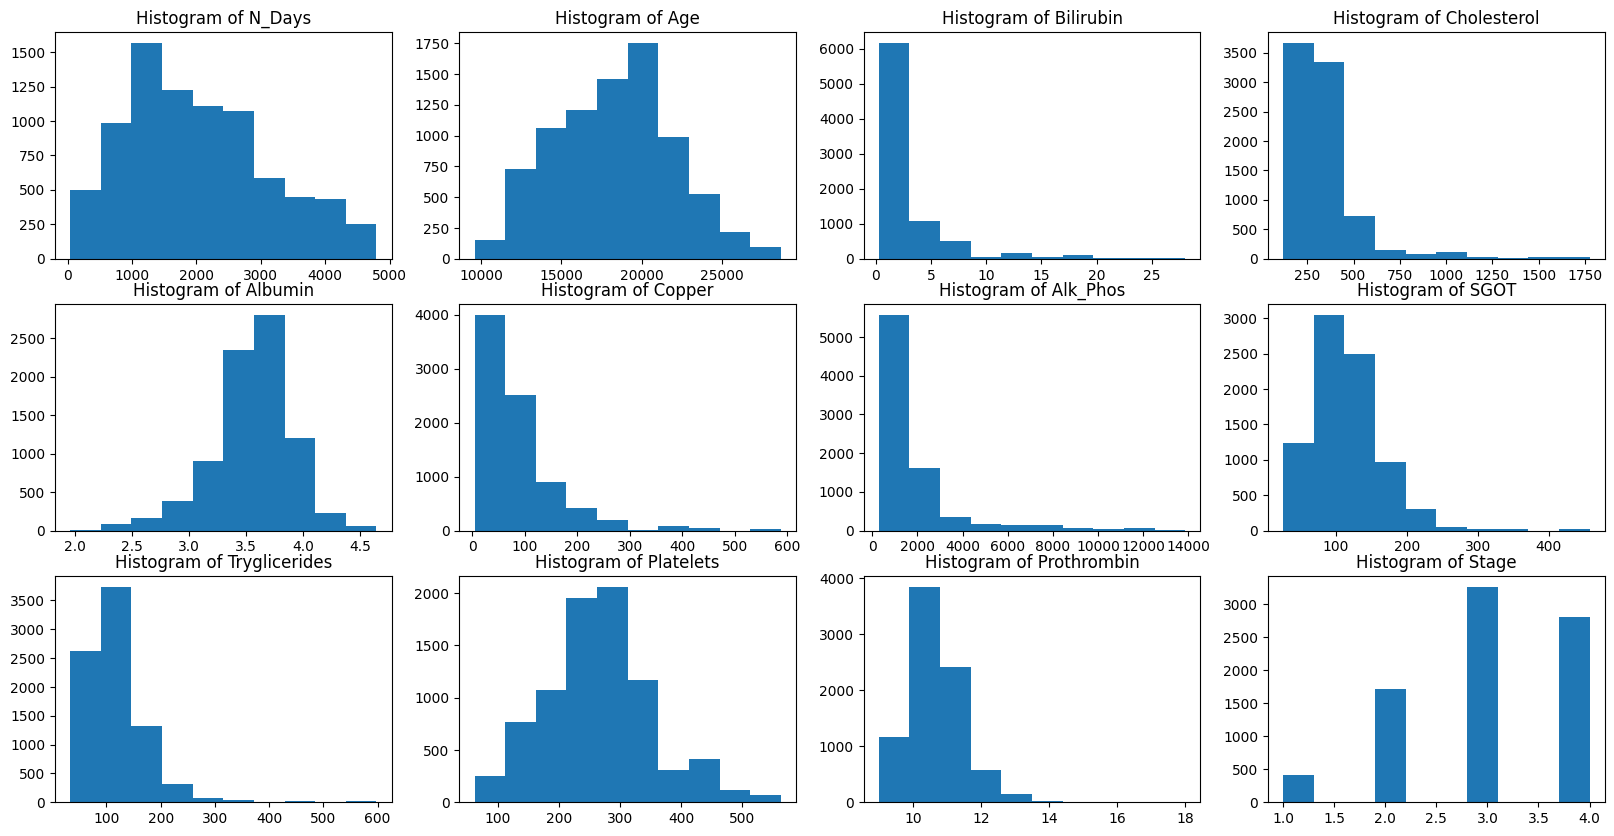

In [28]:
fig, axs = plt.subplots(figsize = (20, 10), nrows = 3, ncols = 4)
axs = np.ravel(axs)

for ind, feature in enumerate(continuous):
  axs[ind].set_title(f"Histogram of {feature}")
  axs[ind].hist(X_features[feature])

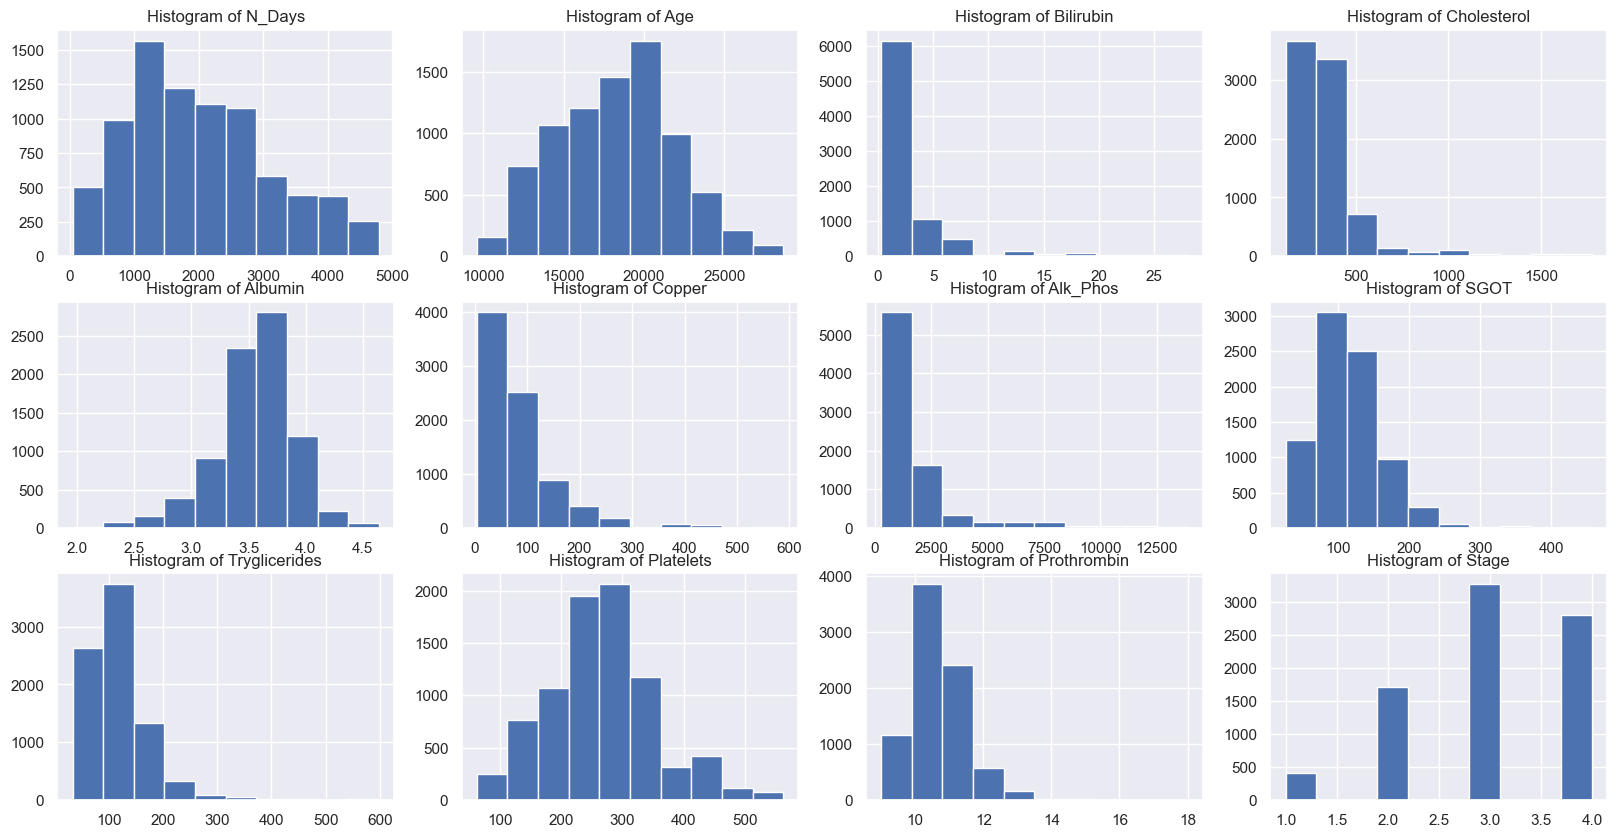

In [48]:
fig, axs = plt.subplots(figsize = (20, 10), nrows = 3, ncols = 4)
axs = np.ravel(axs)

for ind, feature in enumerate(continuous):
  axs[ind].set_title(f"Histogram of {feature}")
  axs[ind].hist(X_features[feature])

axs = np.reshape(axs, (3, 4))\

in this code, what do you think the role of 'np.ravle(axs)'?

In [49]:
y.value_counts()

1    5112
0    2776
2     293
Name: Status, dtype: int64

In [31]:
from scipy.stats import skew

skew_before = X_features[continuous].apply(lambda x: skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출
skew_features_top = skew_before[skew_before > 1]
print(skew_features_top.sort_values(ascending=False))

Cholesterol      3.670279
Bilirubin        3.319784
Alk_Phos         3.189646
Copper           2.683092
Tryglicerides    2.640499
SGOT             1.536857
Prothrombin      1.340904
dtype: float64


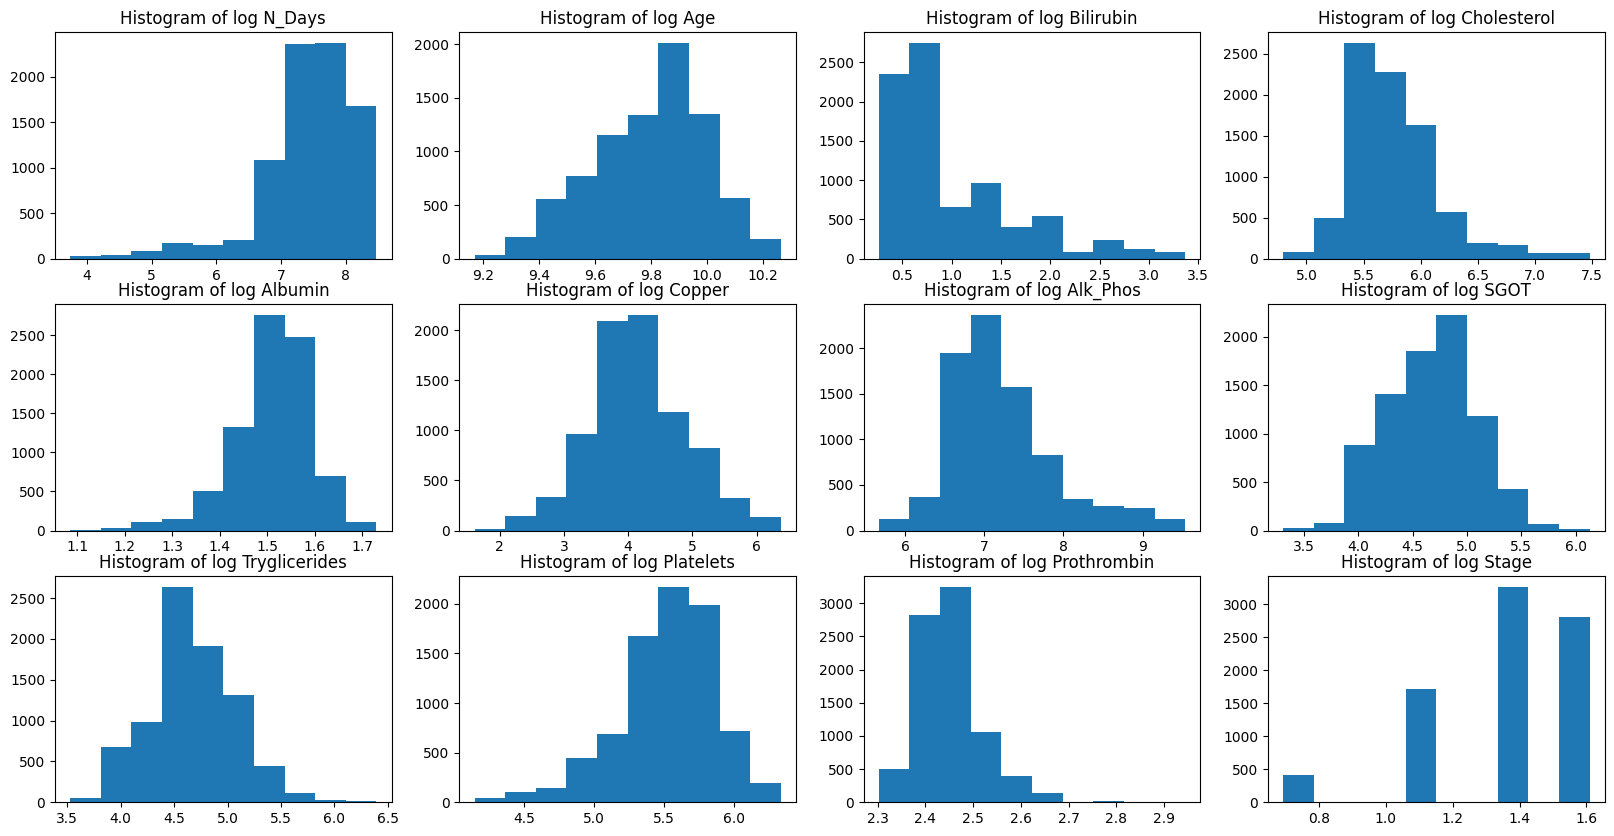

In [33]:
fig, axs = plt.subplots(figsize = (20, 10), nrows = 3, ncols = 4)
axs = np.ravel(axs)

for ind, feature in enumerate(continuous):
  axs[ind].set_title(f"Histogram of log {feature}")
  axs[ind].hist(np.log1p(X_features[feature]))
  #sns.kdeplot(train[list[i]], fill = True)
  #plt.title(f"Density Plot of {list[i]}")
  #plt.xlabel(f"{list[i]}")

axs = np.reshape(axs, (3, 4))

In [34]:
skew_after = np.log1p(X_features[continuous]).apply(lambda x: skew(x))
skew_after

N_Days          -1.610865
Age             -0.356399
Bilirubin        1.409545
Cholesterol      1.274105
Albumin         -0.948108
Copper           0.035444
Alk_Phos         0.994774
SGOT             0.018582
Tryglicerides    0.375418
Platelets       -0.720683
Prothrombin      0.965001
Stage           -1.044909
dtype: float64

In [37]:
df = pd.DataFrame([skew_before, skew_after])
skew_compare = df.T
skew_compare.set_axis(['before', 'after'], axis='columns', inplace=True)
skew_compare

,before,after
N_Days,0.446677,-1.610865
Age,0.087284,-0.356399
Bilirubin,3.319784,1.409545
Cholesterol,3.670279,1.274105
Albumin,-0.566589,-0.948108
Copper,2.683092,0.035444
Alk_Phos,3.189646,0.994774
SGOT,1.536857,0.018582
Tryglicerides,2.640499,0.375418
Platelets,0.417582,-0.720683


log transformation seems worth it for:\
`['Bilirubin','Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides']`

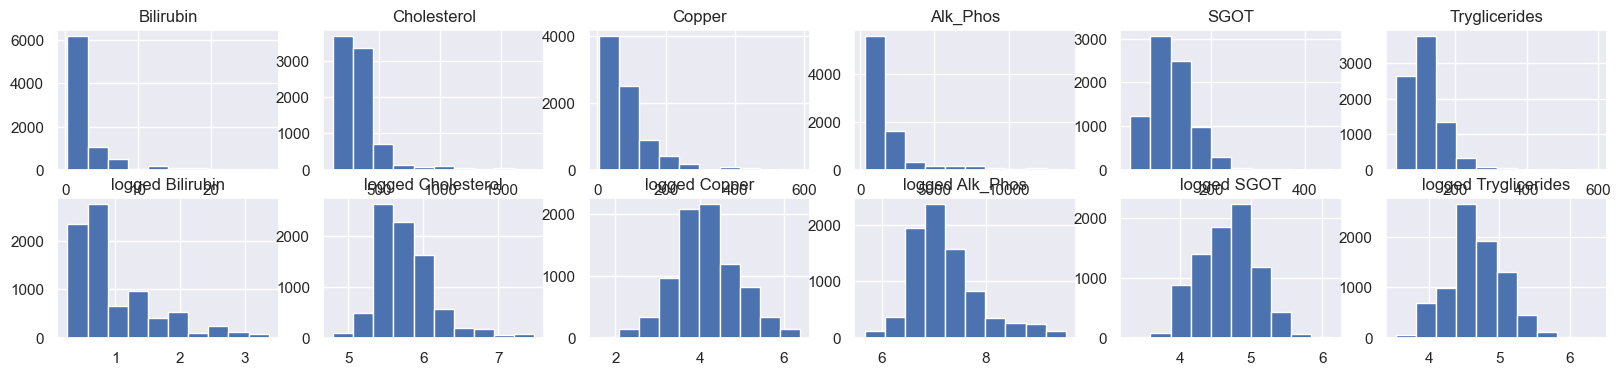

In [38]:
features_to_log = ['Bilirubin','Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides']
sns.set()
fig, axs = plt.subplots(figsize = (20,4), nrows=2, ncols=len(features_to_log))

for ind, feature in enumerate(features_to_log):
  axs[0, ind].set_title(f"{feature}")
  axs[0, ind].hist(X_features[feature])
  axs[1, ind].set_title(f"logged {feature}")
  axs[1, ind].hist(np.log1p(X_features[feature]))

In [39]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         8181 non-null   int64  
 1   Drug           8181 non-null   int32  
 2   Age            8181 non-null   int64  
 3   Sex            8181 non-null   int32  
 4   Ascites        8181 non-null   int32  
 5   Hepatomegaly   8181 non-null   int32  
 6   Spiders        8181 non-null   int32  
 7   Edema          8181 non-null   int32  
 8   Bilirubin      8181 non-null   float64
 9   Cholesterol    8181 non-null   float64
 10  Albumin        8181 non-null   float64
 11  Copper         8181 non-null   float64
 12  Alk_Phos       8181 non-null   float64
 13  SGOT           8181 non-null   float64
 14  Tryglicerides  8181 non-null   float64
 15  Platelets      8181 non-null   float64
 16  Prothrombin    8181 non-null   float64
 17  Stage          8181 non-null   float64
 18  Diseases

untransformed    3.319784
sqrt             1.979754
log              1.409545
dtype: float64


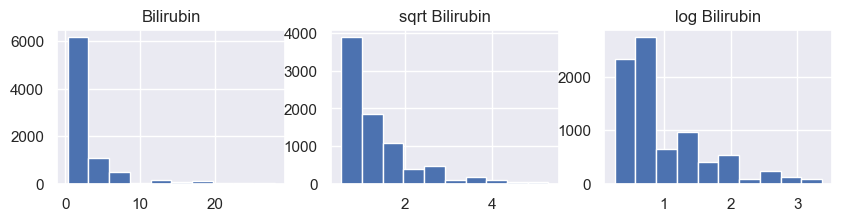

In [40]:
fig, axs = plt.subplots(figsize = (10,2), nrows=1, ncols=3)
axs[0].set_title(f"Bilirubin")
axs[0].hist(X_features['Bilirubin'])
axs[1].set_title(f"sqrt Bilirubin")
axs[1].hist(np.sqrt(X_features['Bilirubin']))
axs[2].set_title(f"log Bilirubin")
axs[2].hist(np.log1p(X_features['Bilirubin']))

bili = pd.concat([X_features['Bilirubin'], np.sqrt(X_features['Bilirubin']), np.log1p(X_features['Bilirubin'])], axis=1)
bili.set_axis(['untransformed', 'sqrt', 'log'], axis='columns', inplace=True)
print(bili.apply(lambda x: skew(x)))

log transformation seems to be the best choice for Bilirubin

In conclusion, let's log transform these features:
`['Bilirubin','Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides']`

In [41]:
features_to_log = ['Bilirubin','Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides']
logged_features = ['log_Bilirubin','log_Cholesterol','log_Copper','log_Alk_Phos','log_SGOT','log_Tryglicerides']

X_features_log = train_le.copy()
for ind, feature in enumerate(features_to_log):
  X_features_log[logged_features[ind]] = np.log1p(train_le[feature])
  X_features_log.drop(feature, axis=1, inplace=True)

test_log = test_le.copy()
for ind, feature in enumerate(features_to_log):
  test_log[logged_features[ind]] = np.log1p(test[feature])
  test_log.drop(feature, axis=1, inplace=True)

In [181]:
test_log.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Albumin,Platelets,Prothrombin,Stage,Diseases,log_Bilirubin,log_Cholesterol,log_Copper,log_Alk_Phos,log_SGOT,log_Tryglicerides
0,3839,0,19724,0,0,1,0,0,3.37,430.0,10.6,2.0,1,0.788457,6.304449,4.189655,7.400621,5.029784,4.510860
1,2468,0,14975,0,0,0,0,0,4.22,227.0,10.0,2.0,0,0.741937,6.493754,4.553877,7.137278,5.029784,5.049856
2,51,1,13149,0,0,1,0,2,2.96,213.0,13.0,4.0,2,1.098612,5.023881,3.850148,6.869014,4.259153,4.624973
3,2330,0,20510,0,0,0,0,0,3.85,270.0,10.6,2.0,0,0.470004,5.683580,3.713572,6.318968,4.840637,4.043051
4,1615,0,21904,0,0,1,0,0,2.97,221.0,9.8,1.0,1,0.875469,5.627621,4.804021,7.013016,4.836282,4.844187


### LGBM with log transformed X features (0.4201)

In [42]:
X_log, y = X_features_log.drop('Status', axis = 1, inplace=False), X_features_log['Status']

In [43]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: Status, dtype: int64

In [45]:
X_log.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Albumin,Platelets,Prothrombin,Stage,Diseases,log_Bilirubin,log_Cholesterol,log_Copper,log_Alk_Phos,log_SGOT,log_Tryglicerides
0,999,0,21532,1,0,0,0,0,3.35,394.0,9.7,3.0,0,1.193922,5.758902,5.153292,7.379008,5.197391,4.158883
1,400,0,21464,0,1,1,1,2,2.60,190.0,12.2,4.0,4,2.740840,5.568345,5.056246,7.449498,4.934114,5.153292
2,2574,1,19237,0,0,0,0,0,3.54,361.0,11.0,3.0,0,0.641854,5.899897,4.158883,7.273093,4.911551,4.488636
3,4500,0,20617,0,0,1,1,0,4.14,221.0,10.6,3.0,2,0.741937,5.713733,4.007333,8.908668,4.740749,4.488636
4,3428,1,13727,0,0,1,1,2,3.55,199.0,11.7,4.0,3,1.458615,5.703782,4.882802,6.937314,4.790404,3.931826


In [190]:
X.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Albumin,Platelets,Prothrombin,Stage,Diseases,log_Bilirubin,log_Cholesterol,log_Copper,log_Alk_Phos,log_SGOT,log_Tryglicerides
0,999,0,21532,1,0,0,0,0,3.35,394.0,9.7,3.0,0,1.193922,5.758902,5.153292,7.379008,5.197391,4.158883
1,400,0,21464,0,1,1,1,2,2.60,190.0,12.2,4.0,4,2.740840,5.568345,5.056246,7.449498,4.934114,5.153292
2,2574,1,19237,0,0,0,0,0,3.54,361.0,11.0,3.0,0,0.641854,5.899897,4.158883,7.273093,4.911551,4.488636
3,4500,0,20617,0,0,1,1,0,4.14,221.0,10.6,3.0,2,0.741937,5.713733,4.007333,8.908668,4.740749,4.488636
4,3428,1,13727,0,0,1,1,2,3.55,199.0,11.7,4.0,3,1.458615,5.703782,4.882802,6.937314,4.790404,3.931826


In [46]:
from sklearn.model_selection import train_test_split
Xlog_train, Xlog_test, y_train, y_test = train_test_split(X_log, y, train_size = 0.8, random_state = 1)

In [195]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier(objective="multiclass", metric='multi_logloss', verbose=-1, early_stopping_rounds=5)

params = {'learning_rate':[0.05 ,0.1, 0.2],
          'n_estimators':[200,300],
          'num_leaves':[64,128,256],
          'max_depth':[4,6,10,12],
          'min_child_samples':[10,20,30]}

In [196]:
from sklearn.metrics import make_scorer, log_loss

# Use log_loss as the scoring metric
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

gridcv = GridSearchCV(estimator=lgbm,
                      param_grid=params,
                      cv=3,
                      n_jobs=-1,
                      scoring=log_loss_scorer,
                      verbose=1)

gridcv.fit(Xlog_train, y_train,
           eval_metric="multi_logloss", eval_set=[(Xlog_train, y_train),(Xlog_test, y_test)])

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=LGBMClassifier(early_stopping_rounds=5,
                                      metric='multi_logloss',
                                      objective='multiclass', verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 10, 12],
                         'min_child_samples': [10, 20, 30],
                         'n_estimators': [200, 300],
                         'num_leaves': [64, 128, 256]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=1)

In [197]:
print("Best parameters:", gridcv.best_params_)
print("Best Negative Log Loss Score:", gridcv.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 64}
Best Negative Log Loss Score: -0.45160107087594276


In [199]:
lgbmlog_params = {'objective': 'multiclass',
               'metric': 'multi_logloss',
               'random_state': 1,
               'learning_rate': 0.05,
               'max_depth': 4,
               'min_child_samples': 30,
               'n_estimators': 200,
               'num_leaves': 64}

lgbm_log = LGBMClassifier(**lgbmlog_params)

lgbm_log.fit(X_log, y)
lgbm_logpred = lgbm_log.predict_proba(test_log)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(lgbm_logpred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
logsub = submission.copy()
logsub.head()
#submission.to_csv('0119_lgbmlog2.csv', index=False)
#! kaggle competitions submit -c playground-series-s3e26 -f 0119_lgbmlog2.csv -m "0119_lgbmlog2"

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 8181, number of used features: 19
[LightGBM] [Info] Start training from score -1.080803
[LightGBM] [Info] Start training from score -0.470224
[LightGBM] [Info] Start training from score -3.329397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

,id,Status_C,Status_CL,Status_D
0,7905,0.564867,0.047051,0.388082
1,7906,0.519539,0.294870,0.185592
2,7907,0.032237,0.009466,0.958297
3,7908,0.953649,0.003021,0.043329
4,7909,0.729923,0.039123,0.230954


In [202]:
lgbm2sub.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.564867,0.047051,0.388082
1,7906,0.519539,0.294870,0.185592
2,7907,0.032237,0.009466,0.958297
3,7908,0.953649,0.003021,0.043329
4,7909,0.729923,0.039123,0.230954


### check for outliers

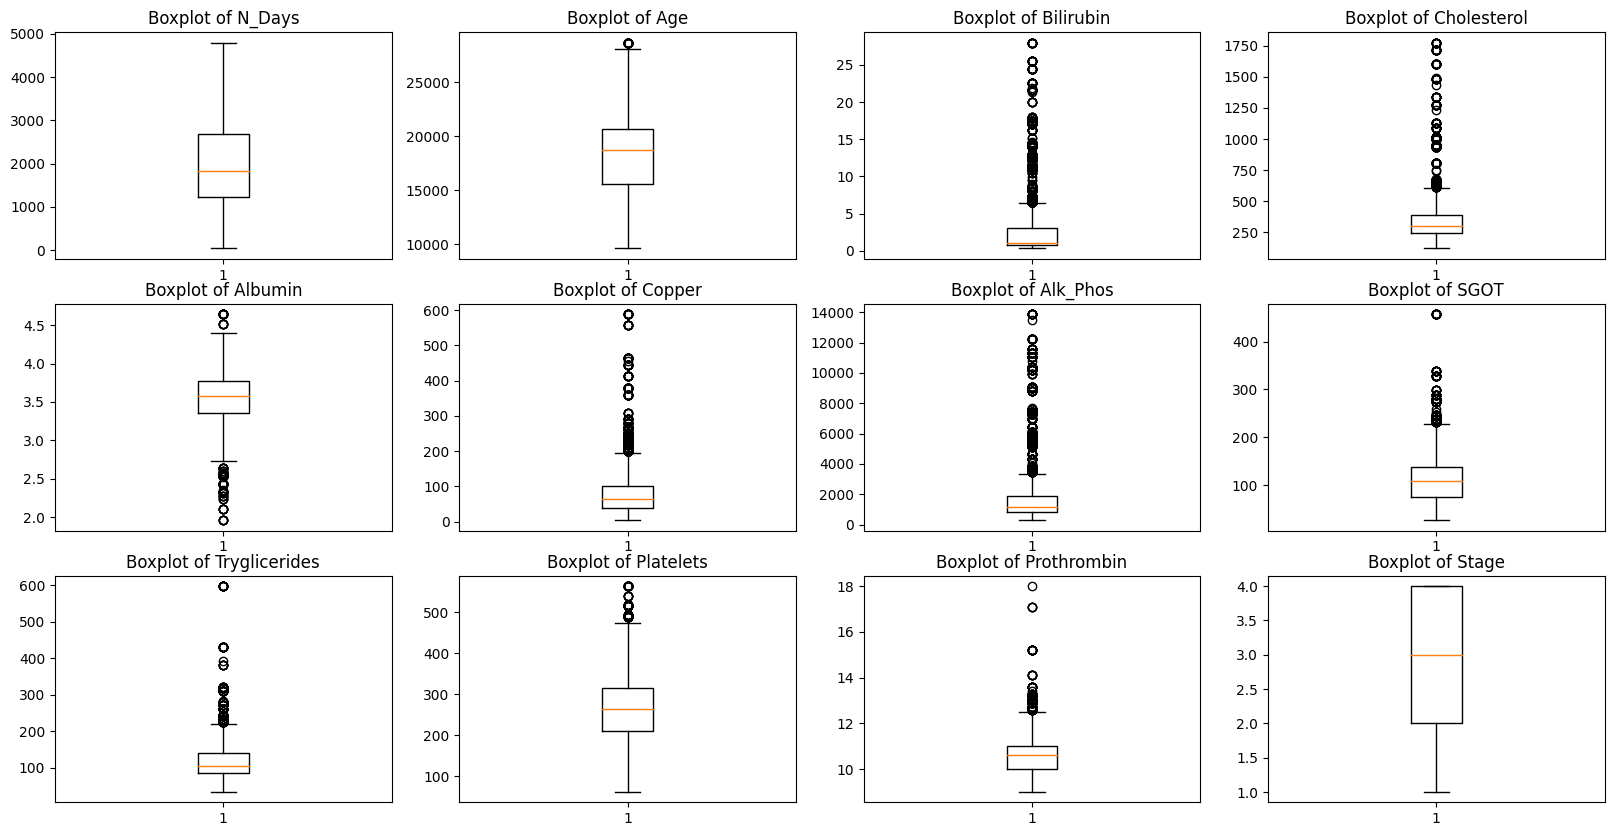

In [144]:
fig, axs = plt.subplots(figsize = (20, 10), nrows = 3, ncols = 4)
axs = np.ravel(axs)

for ind, feature in enumerate(continuous):
  axs[ind].set_title(f"Boxplot of {feature}")
  axs[ind].boxplot(X_features[feature])

axs = np.reshape(axs, (3, 4))

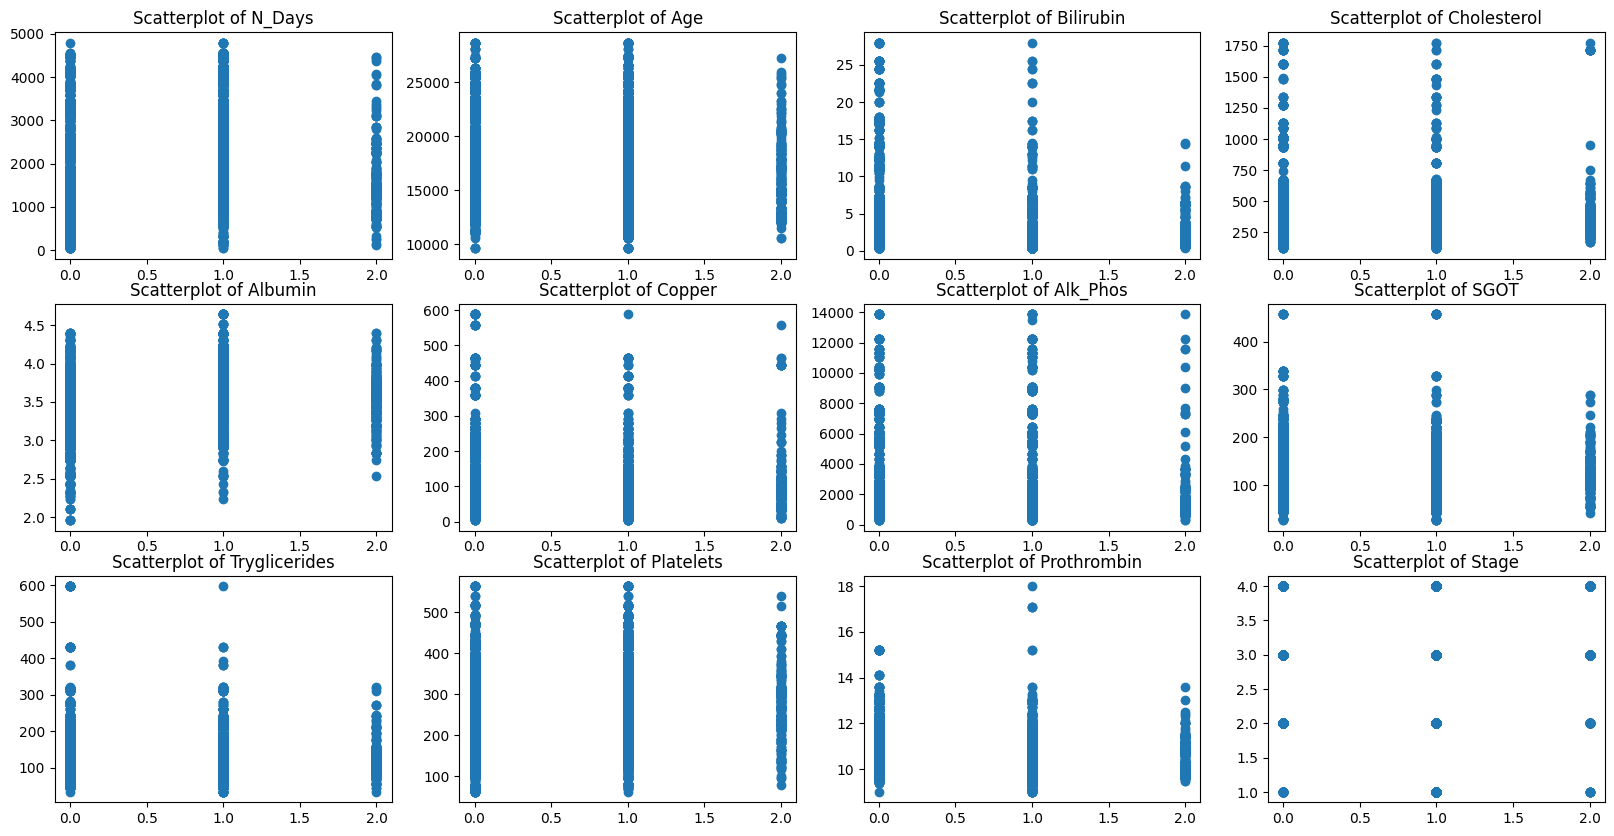

In [145]:
fig, axs = plt.subplots(figsize = (20, 10), nrows = 3, ncols = 4)
axs = np.ravel(axs)

for ind, feature in enumerate(continuous):
  axs[ind].set_title(f"Scatterplot of {feature}")
  axs[ind].scatter(train_le['Status'], train_le[feature])

axs = np.reshape(axs, (3, 4))

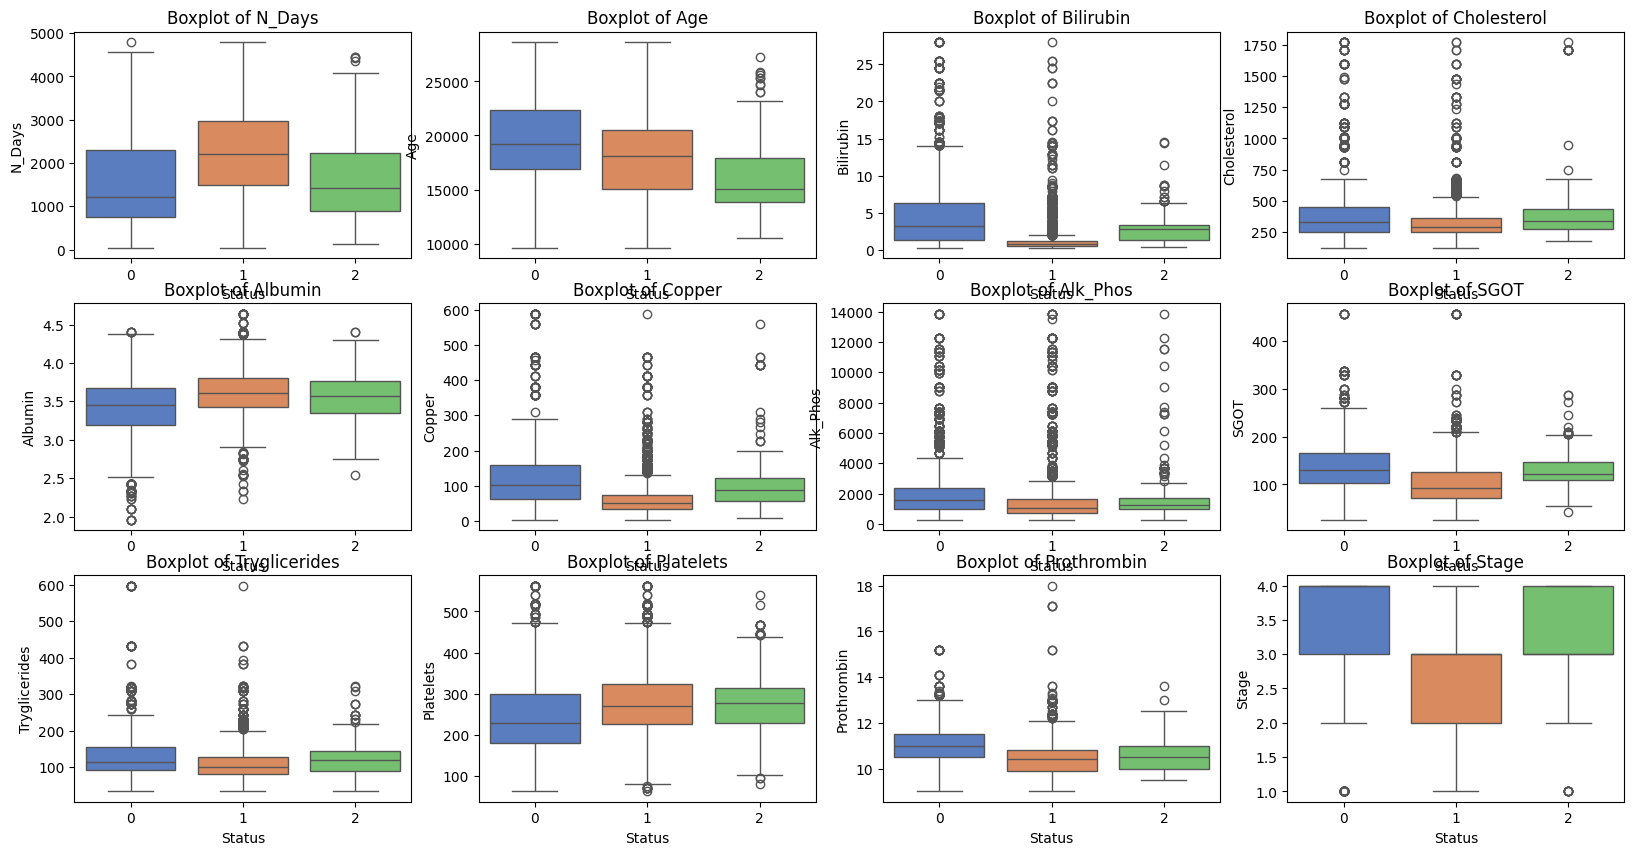

In [165]:
fig, axs = plt.subplots(figsize = (20, 10), nrows = 3, ncols = 4)
axs = np.ravel(axs)

y_target = train_le['Status']

for ind, feature in enumerate(continuous):
  sns.boxplot(x=y_target, y=train_le[feature],
              hue=y_target, palette='muted', legend=False,
              ax=axs[ind]).set(title=f"Boxplot of {feature}")

axs = np.reshape(axs, (3, 4))

In [178]:
# ({"D": 0,"C": 1,"CL": 2})
train_D = train_le[train_le['Status']==0]
train_C = train_le[train_le['Status']==1]
train_CL = train_le[train_le['Status']==2]

KeyError: 'Status'

In [153]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [154]:
statuses = [0,1,2]
for status in statuses:
  print(f"#####     Status = {status}     #####")
  for ind, feature in enumerate(continuous):
    sample_outliers = detect_outliers_iqr(train_le[train_le['Status']==status][feature])
    length = len(sample_outliers)
    print(length, (f" outliers of {feature}: "), sample_outliers)

#####     Status = 0     #####
1  outliers of N_Days:  [4795]
0  outliers of Age:  []
273  outliers of Bilirubin:  [14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.6, 15.2, 15.2, 16.2, 16.2, 16.2, 16.2, 16.2, 16.2, 16.2, 16.2, 16.2, 16.2, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.2, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17

#### Quantile Based Flooring and Capping
In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value. Python code to delete the outlier and copy the rest of the elements to another array.


In [155]:
def flooring_capping(sample):
  # Computing 10th, 90th percentiles and replacing the outliers
  tenth_percentile = np.percentile(sample, 10)
  ninetieth_percentile = np.percentile(sample, 90)
  # print(tenth_percentile, ninetieth_percentile)
  b = np.where(sample<tenth_percentile, tenth_percentile, sample)
  new = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
  return new

In [156]:
train_D_fix_floorcap = train_D.copy()
for ind, feature in enumerate(continuous):
  train_D_fix_floorcap.drop(feature, axis=1, inplace=True)
  train_D_fix_floorcap[feature] = flooring_capping(train_D[feature])

for ind, feature in enumerate(continuous):
  sample_outliers = detect_outliers_iqr(train_D_fix_floorcap[feature])
  length = len(sample_outliers)
  print(length, (f" outliers of Status D {feature}: "), sample_outliers)

0  outliers of Status D N_Days:  []
0  outliers of Status D Age:  []
0  outliers of Status D Bilirubin:  []
0  outliers of Status D Cholesterol:  []
0  outliers of Status D Albumin:  []
0  outliers of Status D Copper:  []
311  outliers of Status D Alk_Phos:  [4651.2, 4651.2, 4651.2, 4651.2, 4651.2, 4651.2, 4651.2, 4651.2, 4651.2, 4651.2, 5084.4, 5084.4, 5084.4, 5084.4, 5084.4, 5084.4, 5184.0, 5184.0, 5184.0, 5184.0, 5184.0, 5300.0, 5300.0, 5300.0, 5300.0, 5300.0, 5300.0, 5300.0, 5300.0, 5300.0, 5300.0, 5300.0, 5300.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348.0, 5348

In [157]:
train_C_fix_floorcap = train_C.copy()
for ind, feature in enumerate(continuous):
  train_C_fix_floorcap.drop(feature, axis=1, inplace=True)
  train_C_fix_floorcap[feature] = flooring_capping(train_C[feature])

for ind, feature in enumerate(continuous):
  sample_outliers = detect_outliers_iqr(train_C_fix_floorcap[feature])
  length = len(sample_outliers)
  print(length, (f" outliers of Status CL {feature}: "), sample_outliers)

0  outliers of Status CL N_Days:  []
0  outliers of Status CL Age:  []
660  outliers of Status CL Bilirubin:  [2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,

In [158]:
train_CL_fix_floorcap = train_CL.copy()
for ind, feature in enumerate(continuous):
  train_CL_fix_floorcap.drop(feature, axis=1, inplace=True)
  train_CL_fix_floorcap[feature] = flooring_capping(train_CL[feature])

for ind, feature in enumerate(continuous):
  sample_outliers = detect_outliers_iqr(train_CL_fix_floorcap[feature])
  length = len(sample_outliers)
  print(length, (f" outliers of Status CL {feature}: "), sample_outliers)

0  outliers of Status CL N_Days:  []
0  outliers of Status CL Age:  []
0  outliers of Status CL Bilirubin:  []
0  outliers of Status CL Cholesterol:  []
0  outliers of Status CL Albumin:  []
0  outliers of Status CL Copper:  []
36  outliers of Status CL Alk_Phos:  [2870.0, 3186.0, 3292.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0]
0  outliers of Status CL SGOT:  []
0  outliers of Status CL Tryglicerides:  []
0  outliers of Status CL Platelets:  []
0  outliers of Status CL Prothrombin:  []
0  outliers of Status CL Stage:  []


#### check results

In [159]:
train_D_fix_floorcap

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status,Diseases,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1,0,0,0,0,0,0,999.0,21532.0,2.3,316.0,3.35,172.0,1601.0,179.80,69.0,371.0,10.0,3.0
1,0,0,1,1,1,2,0,4,400.0,21464.0,14.0,261.0,2.93,156.0,1718.0,137.95,172.0,190.0,12.1,4.0
4,1,0,0,1,1,2,0,3,3358.0,14684.0,3.3,299.0,3.55,131.0,1029.0,119.35,69.0,199.0,11.7,4.0
5,0,1,0,0,0,1,0,1,1012.0,24082.5,1.4,208.0,3.48,210.0,721.0,96.10,69.0,151.0,12.0,4.0
7,0,0,0,1,1,1,0,3,1925.0,19994.0,1.8,244.0,2.93,64.0,5348.0,73.53,92.0,183.0,10.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8170,1,0,0,1,0,0,0,1,935.0,21699.0,4.0,358.0,3.23,219.0,2468.0,198.40,195.0,233.0,11.5,3.0
8174,1,0,1,1,0,2,0,3,264.0,19884.0,5.1,208.0,2.93,231.0,1020.0,120.90,118.0,136.0,12.1,4.0
8175,1,0,0,0,0,0,0,0,1413.0,24082.5,1.3,262.0,3.73,65.0,2045.0,89.90,78.0,181.0,11.0,3.0
8178,0,0,0,0,1,1,0,2,1576.0,24082.5,2.0,225.0,3.19,51.0,933.0,73.53,69.0,200.0,12.1,2.0


In [160]:
temp = pd.concat([train_D_fix_floorcap, train_C_fix_floorcap, train_CL_fix_floorcap], axis=0)
temp = temp.sort_index()
train_floorcap = temp.reset_index(drop=True)
train_floorcap

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status,Diseases,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1,0,0,0,0,0,0,999.0,21532.0,2.3,316.0,3.35,172.0,1601.0,179.80,69.0,371.0,10.0,3.0
1,0,0,1,1,1,2,0,4,400.0,21464.0,14.0,261.0,2.93,156.0,1718.0,137.95,172.0,190.0,12.1,4.0
2,1,0,0,0,0,0,1,0,2574.0,19237.0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
3,0,0,0,1,1,0,1,2,3933.0,20617.0,1.1,302.0,3.99,54.0,2583.0,113.52,88.0,221.0,10.6,3.0
4,1,0,0,1,1,2,0,3,3358.0,14684.0,3.3,299.0,3.55,131.0,1029.0,119.35,69.0,199.0,11.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,0,0,0,0,0,0,1,0,1217.0,16839.0,0.8,309.0,3.56,38.0,1629.0,79.05,164.0,344.0,9.9,2.0
8177,1,0,0,1,0,0,1,1,1492.0,17031.0,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0
8178,0,0,0,0,1,1,0,2,1576.0,24082.5,2.0,225.0,3.19,51.0,933.0,73.53,69.0,200.0,12.1,2.0
8179,0,1,0,1,0,0,0,1,3358.0,22960.0,0.8,248.0,2.93,39.0,1003.0,73.53,118.0,221.0,10.6,4.0


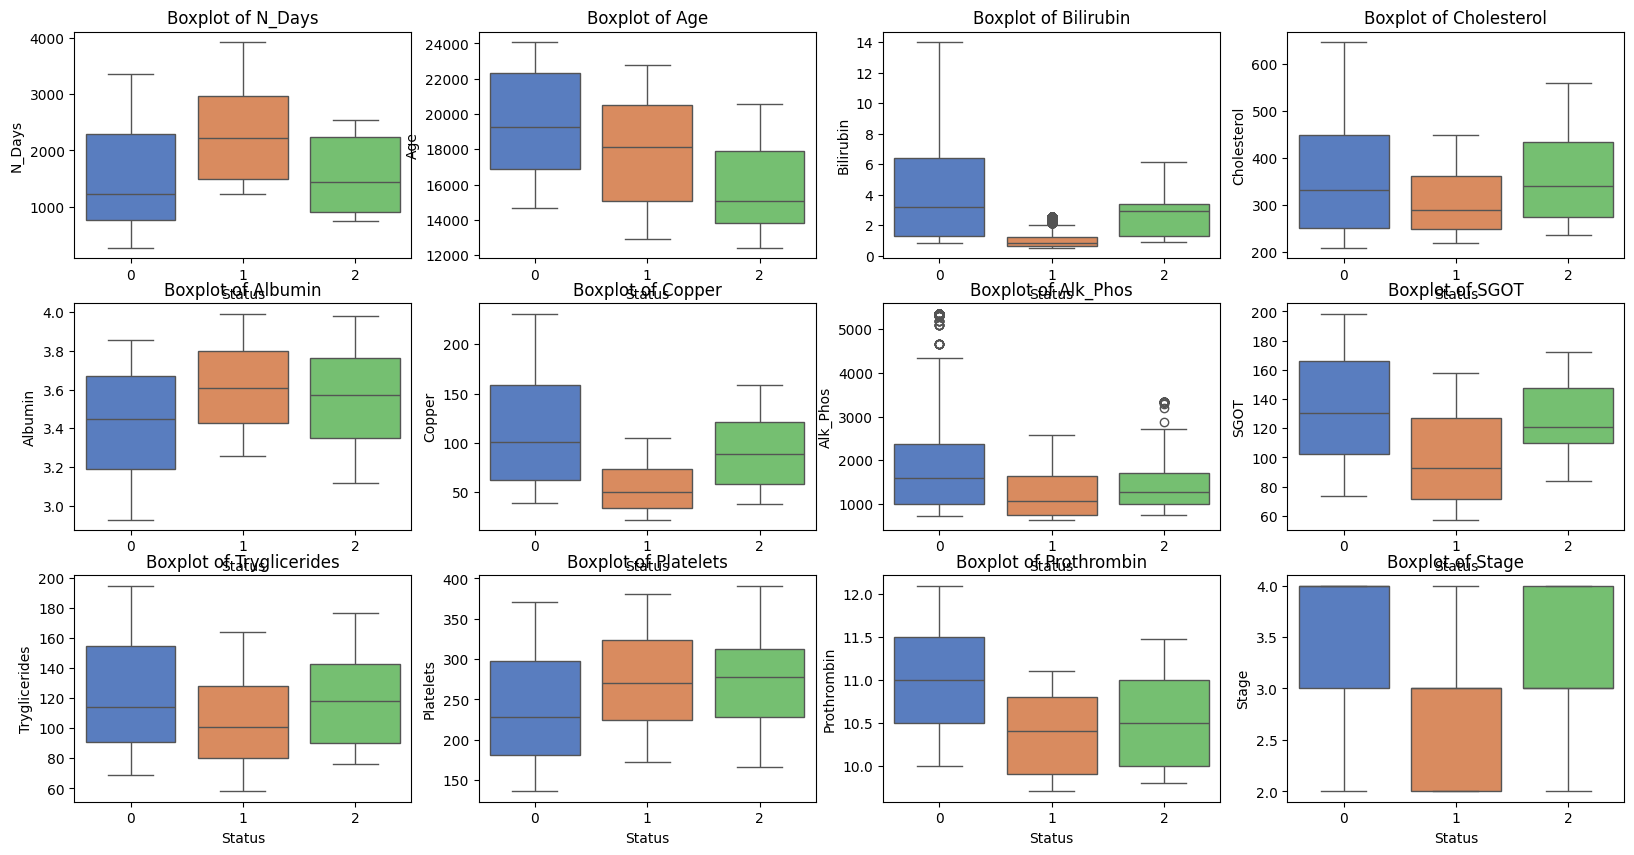

In [166]:
fig, axs = plt.subplots(figsize = (20, 10), nrows = 3, ncols = 4)
axs = np.ravel(axs)

for ind, feature in enumerate(continuous):
  sns.boxplot(data=train_floorcap, x='Status', y=feature,
              hue='Status', palette='muted', legend=False,
              ax=axs[ind]).set(title=f"Boxplot of {feature}")

axs = np.reshape(axs, (3, 4))

#### LGBM with outliers floorcapped (0.65535)

In [170]:
y_target = train_floorcap['Status']
X_features_floorcap = train_floorcap.drop('Status', axis=1, inplace=False)
X_features_floorcap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           8181 non-null   int64  
 1   Sex            8181 non-null   int64  
 2   Ascites        8181 non-null   int64  
 3   Hepatomegaly   8181 non-null   int64  
 4   Spiders        8181 non-null   int64  
 5   Edema          8181 non-null   int64  
 6   Diseases       8181 non-null   int64  
 7   N_Days         8181 non-null   float64
 8   Age            8181 non-null   float64
 9   Bilirubin      8181 non-null   float64
 10  Cholesterol    8181 non-null   float64
 11  Albumin        8181 non-null   float64
 12  Copper         8181 non-null   float64
 13  Alk_Phos       8181 non-null   float64
 14  SGOT           8181 non-null   float64
 15  Tryglicerides  8181 non-null   float64
 16  Platelets      8181 non-null   float64
 17  Prothrombin    8181 non-null   float64
 18  Stage   

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features_floorcap, y_target, train_size = 0.8, random_state = 1)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier(objective="multiclass", metric='multi_logloss', verbose=-1, early_stopping_rounds=5)

params = {'learning_rate':[0.05 ,0.1, 0.2],
          'n_estimators':[200,300],
          'num_leaves':[64,128,256],
          'max_depth':[4,6,10,12],
          'min_child_samples':[10,20,30]}

In [ ]:
from sklearn.metrics import make_scorer, log_loss

# Use log_loss as the scoring metric
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

gridcv = GridSearchCV(estimator=lgbm,
                      param_grid=params,
                      cv=3,
                      n_jobs=-1,
                      scoring=log_loss_scorer,
                      verbose=1)

gridcv.fit(X_train, y_train,
           eval_metric="multi_logloss", eval_set=[(X_train, y_train),(X_test, y_test)])

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=LGBMClassifier(early_stopping_rounds=5,
                                      metric='multi_logloss',
                                      objective='multiclass', verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 10, 12],
                         'min_child_samples': [10, 20, 30],
                         'n_estimators': [200, 300],
                         'num_leaves': [64, 128, 256]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=1)

In [ ]:
print("Best parameters:", gridcv.best_params_)
print("Best Negative Log Loss Score:", gridcv.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 64}
Best Negative Log Loss Score: -0.45121362729003883


In [ ]:
lgbm_params = {'objective': 'multiclass',
               'metric': 'multi_logloss',
               'random_state': 1,
               'learning_rate': 0.05,
               'max_depth': 4,
               'min_child_samples': 30,
               'n_estimators': 200,
               'num_leaves': 64}

lgbm_floorcap = LGBMClassifier(**lgbm_params)

lgbm_floorcap.fit(X, y)
lgbm_floorcappred = lgbm_floorcap.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(lgbm_floorcappred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0119_lgbm_floorcap.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0119_lgbm_floorcap.csv -m "0119_lgbm_floorcap"

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 8181, number of used features: 19
[LightGBM] [Info] Start training from score -1.080803
[LightGBM] [Info] Start training from score -0.470224
[LightGBM] [Info] Start training from score -3.329397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

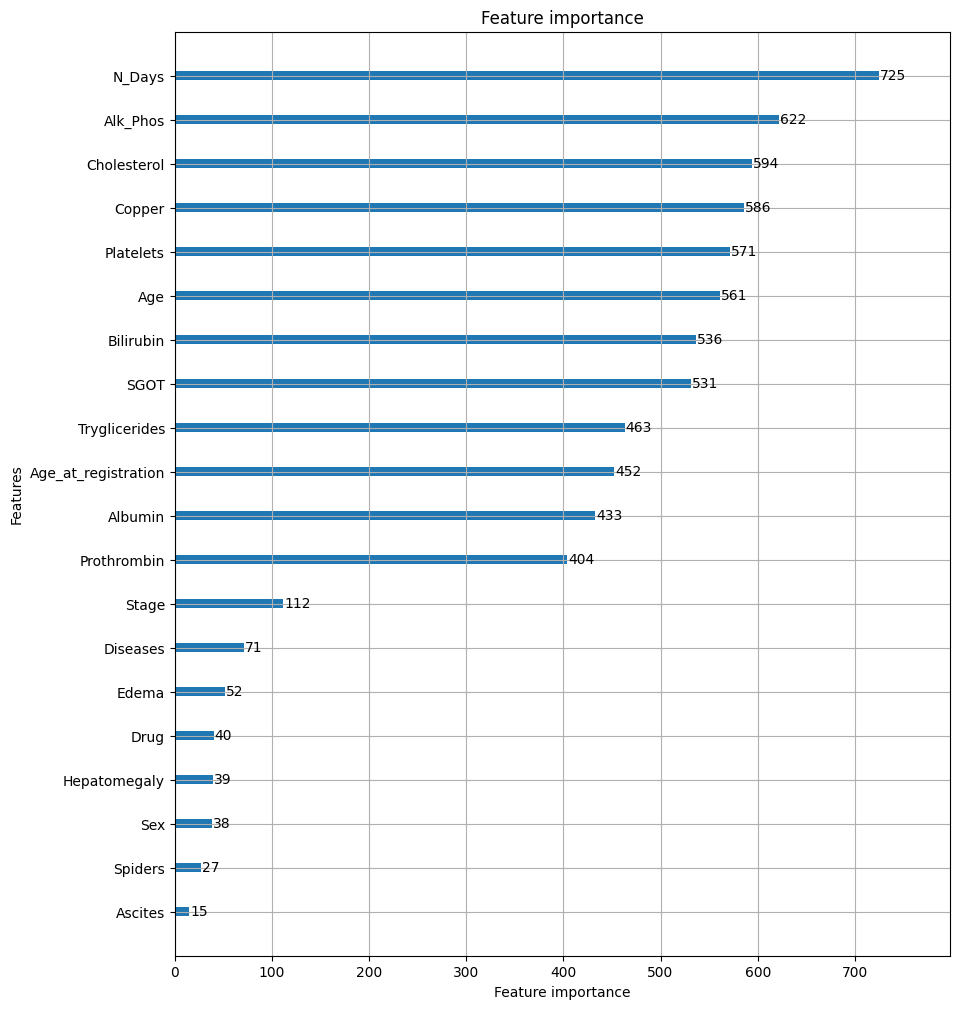

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_tuned, ax=ax)

# 변환 X

In [22]:
X, y = train_le.drop('Status', axis = 1, inplace=False), train_le['Status']

# LGBM (private score: 0.42367)

[3.3.1. The scoring parameter: defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)\
‘neg_log_loss’\
metrics.log_loss\
requires predict_proba support

In [20]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier(objective="multiclass", metric='multi_logloss', verbose=-1, early_stopping_rounds=5)

params = {'learning_rate':[0.05 ,0.1, 0.2],
          'n_estimators':[200,300],
          'num_leaves':[64,128,256],
          'max_depth':[4,6,10,12],
          'min_child_samples':[10,20,30]}

5m

In [ ]:
from sklearn.metrics import make_scorer, log_loss

# Use log_loss as the scoring metric
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

gridcv = GridSearchCV(estimator=lgbm,
                      param_grid=params,
                      cv=3,
                      n_jobs=-1,
                      scoring=log_loss_scorer,
                      verbose=1)

gridcv.fit(X_train, y_train,
           eval_metric="multi_logloss", eval_set=[(X_train, y_train),(X_test, y_test)])

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=LGBMClassifier(early_stopping_rounds=5,
                                      metric='multi_logloss',
                                      objective='multiclass', verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 10, 12],
                         'min_child_samples': [10, 20, 30],
                         'n_estimators': [200, 300],
                         'num_leaves': [64, 128, 256]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=1)

In [ ]:
print("Best parameters:", gridcv.best_params_)
print("Best Negative Log Loss Score:", gridcv.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_samples': 10, 'n_estimators': 200, 'num_leaves': 64}
Best Negative Log Loss Score: -0.4544558795709397


In [ ]:
lgbm_params = {'objective': 'multiclass',
               'metric': 'multi_logloss',
               'random_state': 1,
              'learning_rate': 0.05,
               'max_depth': 4,
               'min_child_samples': 10,
               'n_estimators': 200,
               'num_leaves': 64}

lgbm_tuned = LGBMClassifier(**lgbm_params)

lgbm_tuned.fit(X, y)
lgbm_pred = lgbm_tuned.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(lgbm_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0119_lgbm_tuned3.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0119_lgbm_tuned3.csv -m "0119_lgbm_tuned3"

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 8181, number of used features: 19
[LightGBM] [Info] Start training from score -1.080803
[LightGBM] [Info] Start training from score -0.470224
[LightGBM] [Info] Start training from score -3.329397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

public score: 0.41303

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

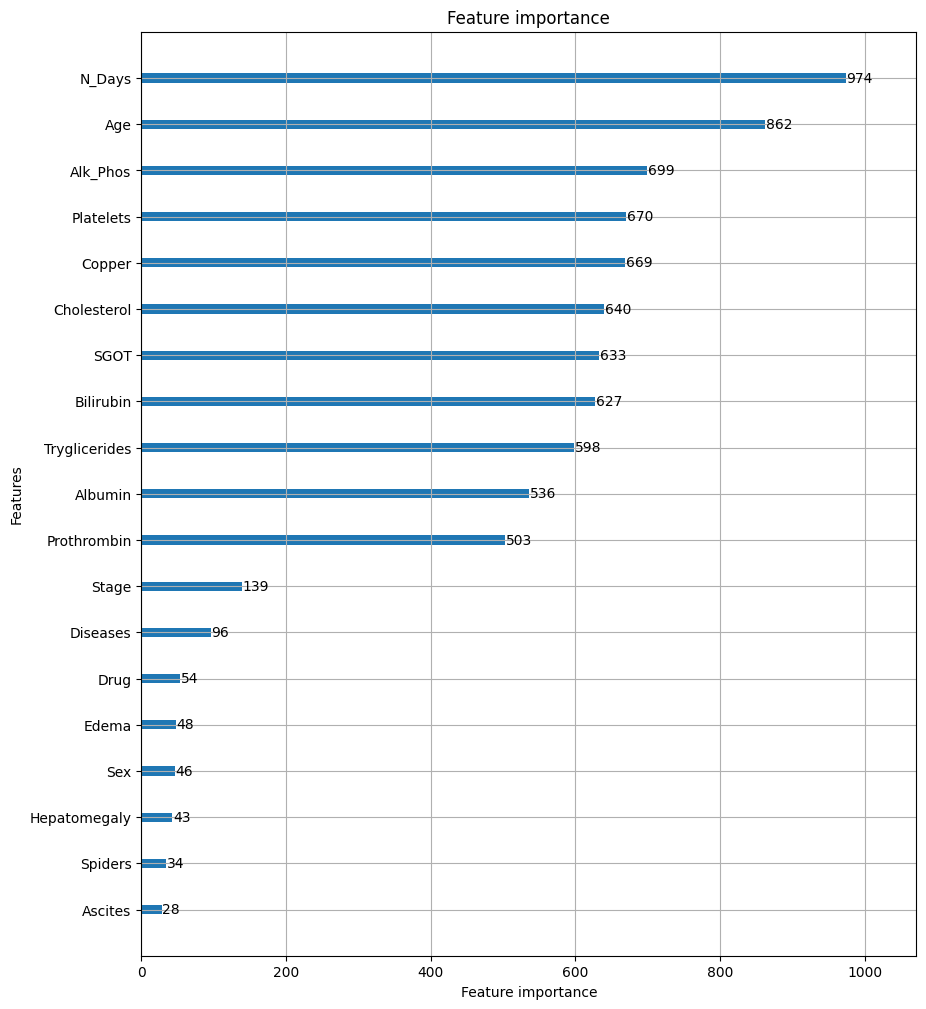

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_tuned, ax=ax)

## Without stratify in train_test_split (0.4201)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [24]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, log_loss

# Use log_loss as the scoring metric
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

8m

In [186]:
lgbm = LGBMClassifier(objective="multiclass", metric='multi_logloss', verbose=-1, early_stopping_rounds=5)

params = {'learning_rate':[0.05 ,0.1, 0.2],
          'n_estimators':[200,300,400],
          'num_leaves':[64,128,256],
          'max_depth':[4,6,10,12],
          'min_child_samples':[10,20,30]}

gridcv = GridSearchCV(estimator=lgbm,
                      param_grid=params,
                      cv=3,
                      n_jobs=-1,
                      scoring=log_loss_scorer,
                      verbose=1)

gridcv.fit(X_train, y_train,
           eval_metric="multi_logloss", eval_set=[(X_train, y_train),(X_test, y_test)])

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=LGBMClassifier(early_stopping_rounds=5,
                                      metric='multi_logloss',
                                      objective='multiclass', verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 10, 12],
                         'min_child_samples': [10, 20, 30],
                         'n_estimators': [200, 300, 400],
                         'num_leaves': [64, 128, 256]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=1)

In [187]:
print("Best parameters:", gridcv.best_params_)
print("Best Negative Log Loss Score:", gridcv.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 64}
Best Negative Log Loss Score: -0.45121362729003883


In [191]:
X.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Diseases
0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,0
1,400,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,4
2,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
3,4500,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,2
4,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,3


In [200]:
lgbm_params = {'objective': 'multiclass',
               'metric': 'multi_logloss',
               'random_state': 1,
               'learning_rate': 0.05,
               'max_depth': 4,
               'min_child_samples': 30,
               'n_estimators': 200,
               'num_leaves': 64}

lgbm2 = LGBMClassifier(**lgbm_params)

lgbm2.fit(X, y)
lgbm2_pred = lgbm2.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(lgbm2_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
lgbm2sub = submission.copy()

#submission.to_csv('0119_lgbm_notstratified3.csv', index=False)
#! kaggle competitions submit -c playground-series-s3e26 -f 0119_lgbm_notstratified3.csv -m "0119_lgbm_notstratified3"

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 8181, number of used features: 19
[LightGBM] [Info] Start training from score -1.080803
[LightGBM] [Info] Start training from score -0.470224
[LightGBM] [Info] Start training from score -3.329397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

## SMOTE (0.47345)

In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)
X_smote, y_smote = sm.fit_resample(X, y)
print("Before smote:", X.shape, y.shape)
print(X_smote.shape, y_smote.shape)

Before smote: (8181, 19) (8181,)
(15336, 19) (15336,)


In [26]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, train_size = 0.8, random_state = 1)

43m

In [27]:
lgbm = LGBMClassifier(objective="multiclass", metric='multi_logloss', verbose=-1, early_stopping_rounds=5)

params = {'learning_rate':[0.05 ,0.1, 0.2],
          'n_estimators':[200,300,400],
          'num_leaves':[64,128,256],
          'max_depth':[4,6,10,12],
          'min_child_samples':[10,20,30]}

gridcv = GridSearchCV(estimator=lgbm,
                      param_grid=params,
                      cv=3,
                      n_jobs=-1,
                      scoring=log_loss_scorer,
                      verbose=1)

gridcv.fit(X_train_smote, y_train_smote,
           eval_metric="multi_logloss", eval_set=[(X_train_smote, y_train_smote),(X_test_smote, y_test_smote)])

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=LGBMClassifier(early_stopping_rounds=5,
                                      metric='multi_logloss',
                                      objective='multiclass', verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 10, 12],
                         'min_child_samples': [10, 20, 30],
                         'n_estimators': [200, 300, 400],
                         'num_leaves': [64, 128, 256]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=1)

In [28]:
print("Best parameters:", gridcv.best_params_)
print("Best Negative Log Loss Score:", gridcv.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 12, 'min_child_samples': 20, 'n_estimators': 300, 'num_leaves': 64}
Best Negative Log Loss Score: -0.28830535249728023


In [29]:
lgbm_params = {'objective': 'multiclass',
               'metric': 'multi_logloss',
               'random_state': 1,
               'learning_rate': 0.05,
               'max_depth': 12,
               'min_child_samples': 20,
               'n_estimators': 300,
               'num_leaves': 64}

lgbm_smote = LGBMClassifier(**lgbm_params)

lgbm_smote.fit(X_smote, y_smote)
lgbm_smote_pred = lgbm_smote.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(lgbm_smote_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0120_lgbm_smote.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0120_lgbm_smote.csv -m "0120_lgbm_smote"

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3053
[LightGBM] [Info] Number of data points in the train set: 15336, number of used features: 19
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
100% 342k/342k [00:00<00:00, 410kB/s] 
Successfully submitted to Multi-Class Prediction of Cirrhosis Outcomes

# XGB (0.41828)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(objective = 'multi:softprob', num_class = 3, verbose = -1,
                    early_stopping_rounds=5, random_state=1)

params = {'learning_rate':[0.05 ,0.1, 0.2],
          'n_estimators':[200,300],
          'max_depth':[4,6,10,12],
          'min_child_weight':[1,3,5,10],
          'subsample':[0.8,0.9, 0.95]}

eval_metric and eval_set are needing for fitting gridsearchcv if you're using early_stopping_rounds because it requires sets and methods to run validations with

In [ ]:
gridcv = GridSearchCV(estimator=xgb,
                      param_grid=params,
                      cv=3,
                      n_jobs=-1,
                      scoring='neg_log_loss',
                      verbose=0)

gridcv.fit(X_train, y_train,
           eval_metric="mlogloss", eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-mlogloss:1.05729	validation_1-mlogloss:1.05689
[1]	validation_0-mlogloss:1.01947	validation_1-mlogloss:1.01872
[2]	validation_0-mlogloss:0.98442	validation_1-mlogloss:0.98342
[3]	validation_0-mlogloss:0.95209	validation_1-mlogloss:0.95086
[4]	validation_0-mlogloss:0.92227	validation_1-mlogloss:0.92109
[5]	validation_0-mlogloss:0.89458	validation_1-mlogloss:0.89335
[6]	validation_0-mlogloss:0.86863	validation_1-mlogloss:0.86728
[7]	validation_0-mlogloss:0.84462	validation_1-mlogloss:0.84333
[8]	validation_0-mlogloss:0.82221	validation_1-mlogloss:0.82089
[9]	validation_0-mlogloss:0.80126	validation_1-mlogloss:0.79997
[10]	validation_0-mlogloss:0.78158	validation_1-mlogloss:0.78045
[11]	validation_0-mlogloss:0.76339	validation_1-mlogloss:0.76238
[12]	validation_0-mlogloss:0.74622	validation_1-mlogloss:0.74562
[13]	validation_0-mlogloss:0.73015	validation_1-mlogloss:0.72980


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:27:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[14]	validation_0-mlogloss:0.71510	validation_1-mlogloss:0.71491
[15]	validation_0-mlogloss:0.70085	validation_1-mlogloss:0.70085
[16]	validation_0-mlogloss:0.68753	validation_1-mlogloss:0.68784
[17]	validation_0-mlogloss:0.67492	validation_1-mlogloss:0.67554
[18]	validation_0-mlogloss:0.66315	validation_1-mlogloss:0.66383
[19]	validation_0-mlogloss:0.65200	validation_1-mlogloss:0.65271
[20]	validation_0-mlogloss:0.64133	validation_1-mlogloss:0.64253
[21]	validation_0-mlogloss:0.63120	validation_1-mlogloss:0.63240
[22]	validation_0-mlogloss:0.62166	validation_1-mlogloss:0.62345
[23]	validation_0-mlogloss:0.61264	validation_1-mlogloss:0.61476
[24]	validation_0-mlogloss:0.60405	validation_1-mlogloss:0.60648
[25]	validation_0-mlogloss:0.59585	validation_1-mlogloss:0.59855
[26]	validation_0-mlogloss:0.58800	validation_1-mlogloss:0.59111
[27]	validation_0-mlogloss:0.58067	validation_1-mlogloss:0.58400
[28]	validation_0-mlogloss:0.57374	validation_1-mlogloss:0.57737
[29]	validation_0-mloglos

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=5,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 10, 12],
                         'min_child_weight': [1, 3, 5, 10],
                         'n_estimators': [200, 300],
                         'subsample': [0.8, 0.9, 0.95]},
             scoring='neg_log_loss')

In [ ]:
print("Best parameters:", gridcv.best_params_)
print("Best Negative Log Loss Score:", gridcv.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
Best Negative Log Loss Score: -0.45173253014790454


In [ ]:
xgb_params = {'objective': 'multi:softprob',
              'num_class': 3,
              'random_state': 1,
              'learning_rate': 0.05,
              'max_depth': 4,
              'min_child_weight': 1,
              'n_estimators': 300,
              'subsample': 0.9}

xgb_tuned = XGBClassifier(**xgb_params)

xgb_tuned.fit(X, y)
xgb_pred = xgb_tuned.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(xgb_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0119_xgb_tuned2.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0119_xgb_tuned2.csv -m "0119_xgb_tuned2"

100% 202k/202k [00:00<00:00, 328kB/s]
Successfully submitted to Multi-Class Prediction of Cirrhosis Outcomes

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

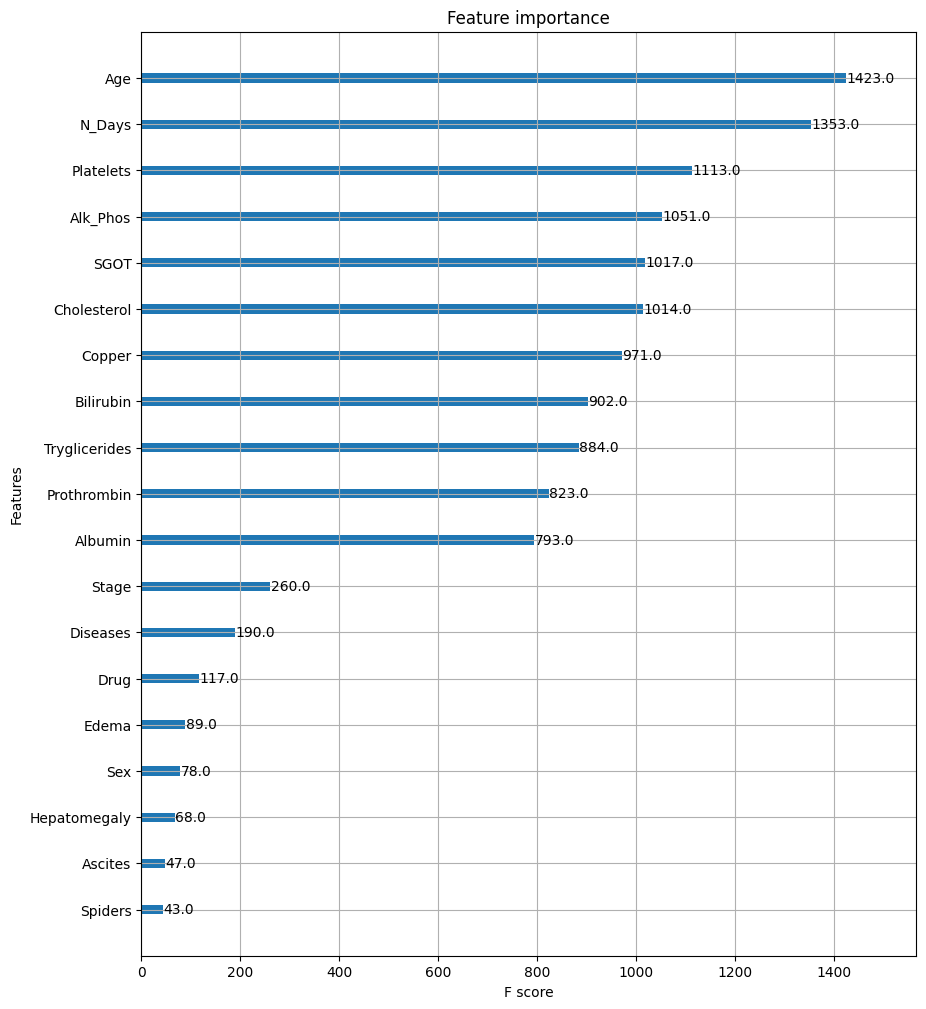

In [127]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_tuned, ax=ax)

public score: 0.41509

## Without stratify=y (0.41632)

18m

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(objective = 'multi:softprob', num_class = 3, verbose = -1,
                    early_stopping_rounds=5, random_state=1)

params = {'learning_rate':[0.05 ,0.1, 0.2],
          'n_estimators':[200,300],
          'max_depth':[4,6,10,12],
          'min_child_weight':[1,3,5,10],
          'subsample':[0.8,0.9, 0.95]}

gridcv = GridSearchCV(estimator=xgb,
                      param_grid=params,
                      cv=3,
                      n_jobs=-1,
                      scoring='neg_log_loss',
                      verbose=0)

gridcv.fit(X_train2, y_train2,
           eval_metric="mlogloss", eval_set=[(X_train2, y_train2), (X_test2, y_test2)])

[0]	validation_0-mlogloss:1.05762	validation_1-mlogloss:1.05751
[1]	validation_0-mlogloss:1.01968	validation_1-mlogloss:1.01957
[2]	validation_0-mlogloss:0.98511	validation_1-mlogloss:0.98489
[3]	validation_0-mlogloss:0.95312	validation_1-mlogloss:0.95320
[4]	validation_0-mlogloss:0.92310	validation_1-mlogloss:0.92328
[5]	validation_0-mlogloss:0.89527	validation_1-mlogloss:0.89565
[6]	validation_0-mlogloss:0.86955	validation_1-mlogloss:0.86981
[7]	validation_0-mlogloss:0.84560	validation_1-mlogloss:0.84637
[8]	validation_0-mlogloss:0.82311	validation_1-mlogloss:0.82425
[9]	validation_0-mlogloss:0.80217	validation_1-mlogloss:0.80377
[10]	validation_0-mlogloss:0.78240	validation_1-mlogloss:0.78423
[11]	validation_0-mlogloss:0.76403	validation_1-mlogloss:0.76607
[12]	validation_0-mlogloss:0.74686	validation_1-mlogloss:0.74923
[13]	validation_0-mlogloss:0.73067	validation_1-mlogloss:0.73330
[14]	validation_0-mlogloss:0.71567	validation_1-mlogloss:0.71844


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:53:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[15]	validation_0-mlogloss:0.70141	validation_1-mlogloss:0.70434
[16]	validation_0-mlogloss:0.68788	validation_1-mlogloss:0.69102
[17]	validation_0-mlogloss:0.67522	validation_1-mlogloss:0.67884
[18]	validation_0-mlogloss:0.66325	validation_1-mlogloss:0.66738
[19]	validation_0-mlogloss:0.65192	validation_1-mlogloss:0.65659
[20]	validation_0-mlogloss:0.64119	validation_1-mlogloss:0.64612
[21]	validation_0-mlogloss:0.63098	validation_1-mlogloss:0.63598
[22]	validation_0-mlogloss:0.62139	validation_1-mlogloss:0.62692
[23]	validation_0-mlogloss:0.61211	validation_1-mlogloss:0.61838
[24]	validation_0-mlogloss:0.60357	validation_1-mlogloss:0.61041
[25]	validation_0-mlogloss:0.59514	validation_1-mlogloss:0.60244
[26]	validation_0-mlogloss:0.58728	validation_1-mlogloss:0.59497
[27]	validation_0-mlogloss:0.57978	validation_1-mlogloss:0.58806
[28]	validation_0-mlogloss:0.57260	validation_1-mlogloss:0.58143
[29]	validation_0-mlogloss:0.56588	validation_1-mlogloss:0.57532
[30]	validation_0-mloglos

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=5,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 10, 12],
                         'min_child_weight': [1, 3, 5, 10],
                         'n_estimators': [200, 300],
                         'subsample': [0.8, 0.9, 0.95]},
             scoring='neg_log_loss')

In [ ]:
print("Best parameters:", gridcv.best_params_)
print("Best Negative Log Loss Score:", gridcv.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best Negative Log Loss Score: -0.4471226951158233


Comparison when stratify=y was used

In [ ]:
#print("Best parameters:", gridcv.best_params_)
#print("Best Negative Log Loss Score:", gridcv.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
Best Negative Log Loss Score: -0.45173253014790454


In [ ]:
xgb_params = {'objective': 'multi:softprob',
              'num_class': 3,
              'random_state': 1,
              'learning_rate': 0.05,
              'max_depth': 4,
              'min_child_weight': 1,
              'n_estimators': 300,
              'subsample': 0.8}

xgb2 = XGBClassifier(**xgb_params)

xgb2.fit(X, y)
xgb2_pred = xgb2.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(xgb2_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0119_xgb_notstratified2.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0119_xgb_notstratified2.csv -m "0119_xgb_notstratified2"

100% 202k/202k [00:00<00:00, 322kB/s] 
Successfully submitted to Multi-Class Prediction of Cirrhosis Outcomes

In [ ]:
#print("Best parameters:", gridcv.best_params_)
#print("Best Negative Log Loss Score:", gridcv.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 64}
Best Negative Log Loss Score: -0.45648694811422647


public score: 0.41246

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

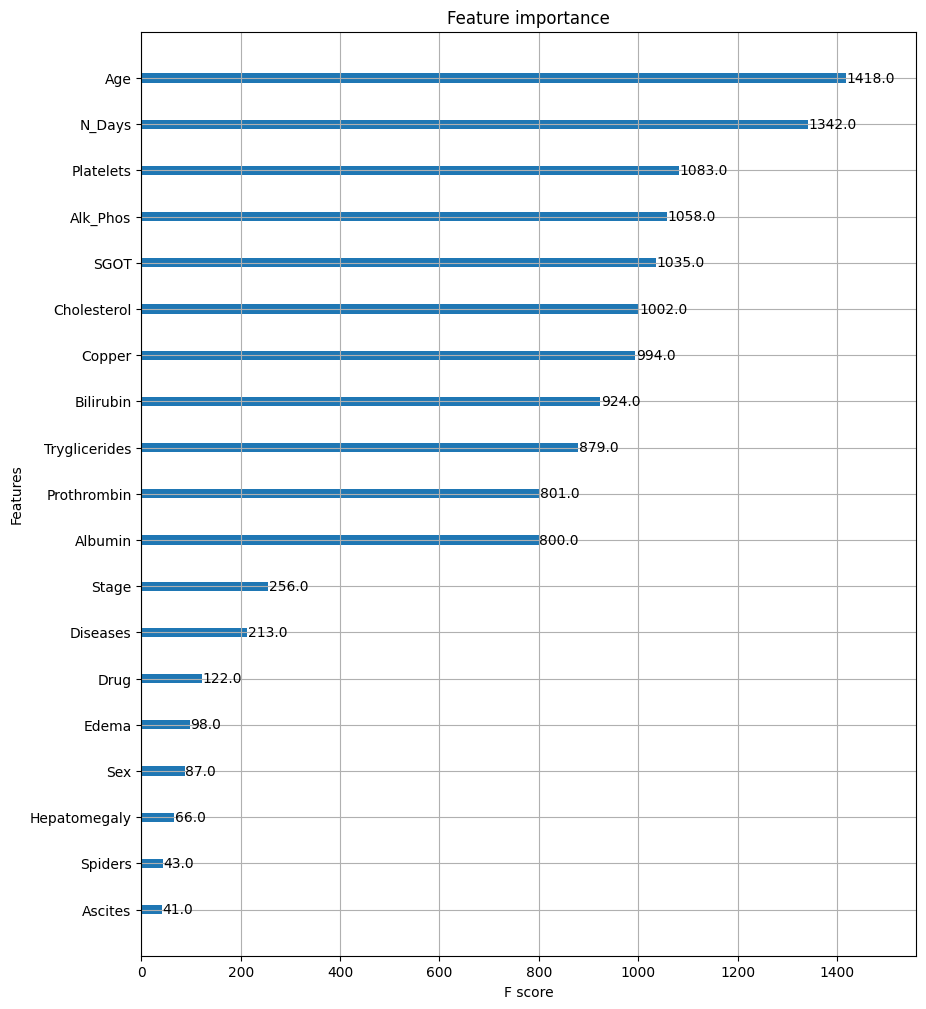

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(xgb2, ax=ax)

# LGBM-XGB Soft Voting (0.41674)

predict_proba is not available when voting='hard'

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[('lgb',lgbm2), ('xgb', xgb2)],
                                voting='soft')
voting_model.fit(X, y)
log_loss(y_test, voting_model.predict_proba(X_test))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 8181, number of used features: 19
[LightGBM] [Info] Start training from score -1.080803
[LightGBM] [Info] Start training from score -0.470224
[LightGBM] [Info] Start training from score -3.329397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

0.29869855678812085

In [ ]:
vote_pred = voting_model.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(vote_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0119_voting2.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0119_voting2.csv -m "0119_voting2"

100% 336k/336k [00:00<00:00, 411kB/s] 
Successfully submitted to Multi-Class Prediction of Cirrhosis Outcomes

public score: 0.40827

# RF (0.43985)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators':[50,100,200],
          'max_depth':[None,3,5,10],
          'min_samples_leaf':[1,2,4],
          'min_samples_split':[2,5,10],
          'max_features':['sqrt', 'log2']}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf = RandomForestClassifier(random_state=1, n_jobs=-1)

log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

gridcv = GridSearchCV(estimator=rf,
                      param_grid=params,
                      cv=3,
                      n_jobs=-1,
                      scoring=log_loss_scorer,
                      verbose=1)
gridcv.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=1)

In [ ]:
print("Best parameters:", gridcv.best_params_)
print("Best Negative Log Loss Score:", gridcv.best_score_)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Negative Log Loss Score: -0.46880361123927033


In [ ]:
rf_params = {'max_depth': None,
             'max_features': 'sqrt',
             'min_samples_leaf': 4,
             'min_samples_split': 2,
             'n_estimators': 200,
             'random_state':1,
             'n_jobs':-1}

rf_tuned = RandomForestClassifier(**rf_params)

rf_tuned.fit(X, y)
rf_pred = rf_tuned.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(rf_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0118_rf_tuned.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0118_rf_tuned.csv -m "0118_rf_tuned"


100% 331k/331k [00:00<00:00, 406kB/s]
Successfully submitted to Multi-Class Prediction of Cirrhosis Outcomes

public score: 0.43985

# LGBM-XGB-RF Voting (0.41202)

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[('lgb',lgbm_tuned), ('xgb', xgb_tuned), ('rf', rf_tuned)],
                                voting='soft')
voting_model.fit(X, y)
log_loss(y_test, voting_model.predict_proba(X_test))

0.27012102940168015

higher than with just LGBM-XGB

In [ ]:
vote_pred = voting_model.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(vote_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0118_voting2.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0118_voting2.csv -m "0118_voting2"

100% 336k/336k [00:00<00:00, 425kB/s]
Successfully submitted to Multi-Class Prediction of Cirrhosis Outcomes

# 스태킹 앙상블 (0.42301)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Assuming you have X, y defined

# Create the stacking classifier
base_models = [('lgbm', lgbm2),('xgb', xgb2)]

#remove early_stopping_rounds?
meta_model = XGBClassifier(objective = 'multi:softprob',
                           num_class = 3, verbose = -1,
                          random_state=1)

stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Define the parameter grid for GridSearchCV
param_grid = {
    'final_estimator__learning_rate': [0.05, 0.1, 0.2],
    'final_estimator__max_depth': [3, 5, 7],
    'final_estimator__n_estimators': [100, 200, 300],
    'final_estimator__min_child_weight':[1,3,5,10],
    'final_estimator__subsample':[0.8,0.9, 0.95]
}

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=stacking_classifier,
                           param_grid=param_grid,
                           scoring='neg_log_loss',
                           cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Log Loss Score:", grid_search.best_score_)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 6544, number of used features: 19
[LightGBM] [Info] Start training from score -1.071180
[LightGBM] [Info] Start training from score -0.474414
[LightGBM] [Info] Start training from score -3.348225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:33:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters:  {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 3, 'final_estimator__min_child_weight': 10, 'final_estimator__n_estimators': 100, 'final_estimator__subsample': 0.9}
Best Negative Log Loss Score: -0.45144148458392075


In [ ]:
meta_params = {'objective': 'multi:softprob',
 'num_class': 3,
 'random_state': 1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 10,
 'n_estimators': 100,
 'subsample': 0.9}

meta_model = XGBClassifier(**meta_params)

stacking_classifier = StackingClassifier(estimators=base_models,
                                         final_estimator=meta_model)
stacking_classifier.fit(X, y)
stacking_pred = stacking_classifier.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(stacking_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0119_stacking.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0119_stacking.csv -m "0119_stacking"

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 8181, number of used features: 19
[LightGBM] [Info] Start training from score -1.080803
[LightGBM] [Info] Start training from score -0.470224
[LightGBM] [Info] Start training from score -3.329397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [ ]:
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from mlxtend.classifier import StackingClassifier

# Assuming you have X and y defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# First layer models
# xgb_tuned and lgbm_tuned and rf_tuned

# StackingClassifier as the final model
stacked_model = StackingClassifier(
    classifiers=[xgb2, lgbm2],
    meta_classifier=XGBClassifier(objective = 'multi:softprob', num_class = 3, verbose = -1,
                    early_stopping_rounds=5, random_state=1),
    use_probas=True)  # Ensure base models predict probabilities


params = {'learning_rate':[0.05 ,0.1, 0.2],
          'n_estimators':[200,300],
          'max_depth':[4,6,10,12],
          'min_child_weight':[1,3,5,10],
          'subsample':[0.8,0.9, 0.95]}

gridcv = GridSearchCV(estimator=xgb,
                      param_grid=params,
                      cv=3,
                      n_jobs=-1,
                      scoring='neg_log_loss',
                      verbose=0)

gridcv.fit(X_train2, y_train2,
           eval_metric="mlogloss", eval_set=[(X_train2, y_train2), (X_test2, y_test2)])


# Train the ensemble
stacked_model.fit(X_train, y_train)

# Predictions
y_pred = stacked_model.predict(X_test)
y_pred_proba = stacked_model.predict_proba(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
print("Accuracy:", accuracy)
print("Log Loss:", logloss)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 6544, number of used features: 19
[LightGBM] [Info] Start training from score -1.071180
[LightGBM] [Info] Start training from score -0.474414
[LightGBM] [Info] Start training from score -3.348225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [ ]:
xgb2.fit(X, y)
xgb2_pred = xgb2.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(xgb2_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0119_xgb_notstratified2.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0119_xgb_notstratified2.csv -m "0119_xgb_notstratified2"

In [ ]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    #skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=1)
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작 ')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')

        # Reset indices for X_train_n and y_train_n
        X_tr = X_train_n.iloc[train_index]
        y_tr = y_train_n.iloc[train_index]
        X_te = X_train_n.iloc[valid_index]

        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    return train_fold_pred, test_pred_mean


In [ ]:
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_tuned, X_train, y_train, X_test, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_tuned, X_train, y_train, X_test, 5)
rf_train, rf_test = get_stacking_base_datasets(rf_tuned, X_train, y_train, X_test, 5)

LGBMClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [ ]:
Stack_final_X_train = np.concatenate((lgbm_train, xgb_train, rf_train), axis=1)
Stack_final_X_test = np.concatenate((lgbm_test, xgb_test, rf_test), axis=1)
print('원본 학습 피처 데이터 Shape:' ,X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:' , Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:' ,Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (6544, 20) 원본 테스트 피처 Shape: (1637, 20)
스태킹 학습 피처 데이터 Shape: (6544, 3) 스태킹 테스트 피처 데이터 Shape: (1637, 3)


In [ ]:
# Assuming you have lgbm_tuned, xgb_tuned, rf_tuned already trained
# Train base models on the entire training dataset
# Use base models to predict probabilities on the entire training dataset
lgbm_train_pred = lgbm_tuned.predict_proba(X)
xgb_train_pred = xgb_tuned.predict_proba(X)
rf_train_pred = rf_tuned.predict_proba(X)

# Assuming lgbm, xgb, and rf have classes 0, 1, and 2
# Create input features for the stacking model
lgbm_train = lgbm_train_pred  # Assuming classes are 0, 1, 2
xgb_train = xgb_train_pred
rf_train = rf_train_pred

# Concatenate the predictions of base models to create Stack_final_X_train
Stack_final_X_train = np.concatenate((lgbm_train, xgb_train, rf_train), axis=1)


In [ ]:
# Assuming you have lgbm_tuned, xgb_tuned, rf_tuned already trained
# Use base models to predict probabilities on the actual test dataset
lgbm_test_pred = lgbm_tuned.predict_proba(test_le)
xgb_test_pred = xgb_tuned.predict_proba(test_le)
rf_test_pred = rf_tuned.predict_proba(test_le)

# Create input features for the stacking model
lgbm_test = lgbm_test_pred  # Assuming classes are 0, 1, 2
xgb_test = xgb_test_pred
rf_test = rf_test_pred

# Concatenate the predictions of base models to create stack_final_X_test
stack_final_X_test = np.concatenate((lgbm_test, xgb_test, rf_test), axis=1)

In [ ]:
stacking_model = LogisticRegression(random_state=1)
stacking_model.fit(Stack_final_X_train, y)
final_predictions_proba = stacking_model.predict_proba(stack_final_X_test)

In [ ]:
pd.DataFrame(final_predictions_proba)

,0,1,2
0,0.282370,0.602411,0.115219
1,0.232281,0.656282,0.111436
2,0.839775,0.047482,0.112743
3,0.017082,0.976424,0.006494
4,0.116054,0.872310,0.011635
...,...,...,...
5266,0.089710,0.896569,0.013721
5267,0.027290,0.966024,0.006686
5268,0.014841,0.980702,0.004457
5269,0.012595,0.982239,0.005166


In [ ]:
pred_proba = pd.DataFrame(final_predictions_proba, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0118_stacking.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0118_stacking.csv -m "0118_stacking"

100% 336k/336k [00:00<00:00, 421kB/s]
Successfully submitted to Multi-Class Prediction of Cirrhosis Outcomes

public score: 0.50251

# LGBM Optuna Optimization (0.40141)

[Optuna 사용법](https://optuna.org/)
A simple optimization problem:
1. Define objective function to be optimized. Let's minimize (x - 2)^2
2. Suggest hyperparameter values using trial object. Here, a float value of x is suggested from -10 to 10
3. Create a study object and invoke the optimize method over 100 trials

```
import optuna

def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=100)

study.best_params  # E.g. {'x': 2.002108042}
```

In [ ]:
! pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.8 MB/s eta 0:00:00


11m

In [ ]:
from sklearn.model_selection import cross_val_score

def objective_lgbm(trial):
    # Hyperparameters to be tuned
    params = {
              'objective': 'multiclass',
              'num_class': 3,
              'max_depth': trial.suggest_int('max_depth',1,10),
              'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
              'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.1),
              'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
              'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
              'subsample': trial.suggest_float('subsample', 0.8, 1.0),
              'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.2),
              'reg_alpha': trial.suggest_float('reg_alpha', 0.8, 1.0),
              'reg_lambda': trial.suggest_float('reg_lambda', 0.8, 1.0),
              'num_leaves': trial.suggest_int('num_leaves', 10, 100),
              'random_state': 1
            }


    model = LGBMClassifier(**params, verbose=-1)

    scores = cross_val_score(model, X , y, cv=5, scoring='neg_log_loss')

    return -scores.mean()

# Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective_lgbm, n_trials=100)  # Adjust the number of trials to 100-1000

# Best hyperparameters
best_params = study.best_params
print('Best Parameters:', best_params)

[I 2024-01-19 08:18:44,499] A new study created in memory with name: no-name-47ec4c9c-5cff-4168-af74-1bb6e9509b23
[I 2024-01-19 08:18:50,935] Trial 0 finished with value: 0.43410289398949303 and parameters: {'max_depth': 10, 'min_child_samples': 24, 'learning_rate': 0.09385342241121877, 'n_estimators': 447, 'min_child_weight': 17, 'subsample': 0.9346944034965667, 'colsample_bytree': 0.12188969020688431, 'reg_alpha': 0.9682518955530982, 'reg_lambda': 0.9000218556544798, 'num_leaves': 75}. Best is trial 0 with value: 0.43410289398949303.
[I 2024-01-19 08:18:58,867] Trial 1 finished with value: 0.4283050595233391 and parameters: {'max_depth': 3, 'min_child_samples': 36, 'learning_rate': 0.0709893206074125, 'n_estimators': 480, 'min_child_weight': 2, 'subsample': 0.823586956794484, 'colsample_bytree': 0.12205618299773663, 'reg_alpha': 0.8144297870445355, 'reg_lambda': 0.8120355348839168, 'num_leaves': 82}. Best is trial 1 with value: 0.4283050595233391.
[I 2024-01-19 08:19:03,349] Trial 2 

Best Parameters: {'max_depth': 8, 'min_child_samples': 10, 'learning_rate': 0.04458999742930705, 'n_estimators': 226, 'min_child_weight': 3, 'subsample': 0.9856630287322209, 'colsample_bytree': 0.15426650082263144, 'reg_alpha': 0.9235897801900184, 'reg_lambda': 0.9609878081857768, 'num_leaves': 71}


In [ ]:
lgbm_params =  {'objective': 'multiclass',
                'num_class': 3,
                'random_state': 1,
                'max_depth': 8,
                'min_child_samples': 10,
                'learning_rate': 0.04458999742930705,
                'n_estimators': 226,
                'min_child_weight': 3,
                'subsample': 0.9856630287322209,
                'colsample_bytree': 0.15426650082263144,
                'reg_alpha': 0.9235897801900184,
                'reg_lambda': 0.9609878081857768,
                'num_leaves': 71}

lgbm_optuna = LGBMClassifier(**lgbm_params)

lgbm_optuna.fit(X, y)
lgbm_pred = lgbm_optuna.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(lgbm_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0119_lgbm_optuna2.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0119_lgbm_optuna2.csv -m "0119_lgbm_optuna2"

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 8181, number of used features: 19
[LightGBM] [Info] Start training from score -1.080803
[LightGBM] [Info] Start training from score -0.470224
[LightGBM] [Info] Start training from score -3.329397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

# XGB Optuna Optimization (0.39855)

In [ ]:
def objective_xgb(trial):

    params = {'objective': 'multi:softprob',
              'num_class': 3,
              'random_state': 1,
              'max_depth': trial.suggest_int('max_depth', 1, 10),
              'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
              'n_estimators': trial.suggest_int('n_estimators', 200, 600),
              'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
              'subsample': trial.suggest_float('subsample', 0.8, 1.0),
              'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5),
              'reg_alpha': trial.suggest_float('reg_alpha', 0.8, 1.0),
              'reg_lambda': trial.suggest_float('reg_lambda', 0.8, 1.0)
            }

    model = XGBClassifier(**params)

    scores = cross_val_score(model, X, y, cv=5, scoring='neg_log_loss')

    return -scores.mean()


study = optuna.create_study(direction='minimize')
study.optimize(objective_xgb , n_trials=100) # Adjust the number of trials to 100-1000

xgb_best_params = study.best_params
print('Best params:' , xgb_best_params)

[I 2024-01-19 07:42:29,374] A new study created in memory with name: no-name-ed782b9e-7831-4fa0-b3c4-3a7951447761
[I 2024-01-19 07:42:52,143] Trial 0 finished with value: 0.4263066752979401 and parameters: {'max_depth': 10, 'learning_rate': 0.025887672489057795, 'n_estimators': 433, 'min_child_weight': 9, 'subsample': 0.8678287067809785, 'colsample_bytree': 0.32885072624539885, 'reg_alpha': 0.8877292618426198, 'reg_lambda': 0.8754298538908405}. Best is trial 0 with value: 0.4263066752979401.
[I 2024-01-19 07:42:55,266] Trial 1 finished with value: 0.46779798271102696 and parameters: {'max_depth': 4, 'learning_rate': 0.042201336993169976, 'n_estimators': 257, 'min_child_weight': 8, 'subsample': 0.9721103221968106, 'colsample_bytree': 0.10510699741094238, 'reg_alpha': 0.8076417686040365, 'reg_lambda': 0.9198203537817722}. Best is trial 0 with value: 0.4263066752979401.
[I 2024-01-19 07:43:02,155] Trial 2 finished with value: 0.44629750759791265 and parameters: {'max_depth': 7, 'learning_

Best params: {'max_depth': 9, 'learning_rate': 0.031763977678352144, 'n_estimators': 503, 'min_child_weight': 3, 'subsample': 0.8035555133495039, 'colsample_bytree': 0.10768477385456883, 'reg_alpha': 0.8003723149948386, 'reg_lambda': 0.8398417586763194}


In [ ]:
xgb_params =  {'objective': 'multi:softprob',
                'num_class': 3,
                'random_state': 1,
                'max_depth': 9,
               'learning_rate': 0.031763977678352144,
               'n_estimators': 503,
               'min_child_weight': 3,
               'subsample': 0.8035555133495039,
               'colsample_bytree': 0.10768477385456883,
               'reg_alpha': 0.8003723149948386,
               'reg_lambda': 0.8398417586763194}

xgb_optuna = XGBClassifier(**xgb_params)

xgb_optuna.fit(X, y)
xgb_pred = xgb_optuna.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(xgb_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0119_xgb_optuna.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0119_xgb_optuna.csv -m "0119_xgb_optuna"

100% 202k/202k [00:00<00:00, 300kB/s] 
Successfully submitted to Multi-Class Prediction of Cirrhosis Outcomes

# Optuna LGBM-XGB Voting (0.39827: 26등/1664)

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[('lgb',lgbm_optuna), ('xgb', xgb_optuna)],
                                voting='soft')
voting_model.fit(X, y)
log_loss(y_test, voting_model.predict_proba(X_test))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 8181, number of used features: 19
[LightGBM] [Info] Start training from score -1.080803
[LightGBM] [Info] Start training from score -0.470224
[LightGBM] [Info] Start training from score -3.329397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

0.23587120125508743

In [ ]:
vote_pred = voting_model.predict_proba(test_le)
#status_map = status.map({"D": 0,"C": 1,"CL": 2})
pred_proba = pd.DataFrame(vote_pred, columns=['D', 'C', 'CL'])
submission = sample_sub.copy()
submission['Status_C'] = pred_proba['C']
submission['Status_CL'] = pred_proba['CL']
submission['Status_D'] = pred_proba['D']
submission.to_csv('0119_optuna_voting2.csv', index=False)
! kaggle competitions submit -c playground-series-s3e26 -f 0119_optuna_voting2.csv -m "0119_optuna_voting2"

100% 336k/336k [00:00<00:00, 578kB/s] 
Successfully submitted to Multi-Class Prediction of Cirrhosis Outcomes

public score: 0.40827